I began my program by reading in the Titanic data set, correcting variable types, correctly marking missing values, and removing unnecessary columns

In [1]:
library(ggplot2)
titanic=read.csv("train.csv")
titanic$Survived=factor(titanic$Survived)
titanic$Pclass=factor(titanic$Pclass)
titanic$PassengerId=factor(titanic$PassengerId)
titanic[titanic$Embarked=="",]$Embarked=NA
titanic[titanic$Cabin=="",]$Cabin=NA
titanic$Name=NULL
titanic$PassengerId=NULL
titanic$Ticket=NULL
titanic$Cabin=NULL
str(titanic)

'data.frame':	891 obs. of  8 variables:
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


Write a function that inputs a dataset (data frame) and outputs the number of missing values in each variables

In [2]:
countmiss=function(x){
  for (i in 1:ncol(x)){
    print(sum(is.na(x[,i])))
  }
}
countmiss(titanic)

[1] 0
[1] 0
[1] 0
[1] 177
[1] 0
[1] 0
[1] 0
[1] 2


Write a function that inputs a dataset and outputs the names of variables with missing values

In [4]:
missvars=function(x){
  for (i in 1:ncol(x)){
    if (sum(is.na(x[,i]))>0){
      print(names(x)[i])
    }
  }
}
missvars(titanic)

[1] "Age"
[1] "Embarked"


Write a function that inputs a dataset and outputs (1) the names of variables with missing values and (2) the corresponding number of missing values in each variables

In [5]:
missvars2=function(x){
  for (i in 1:ncol(x)){
    if (sum(is.na(x[,i]))>0){
      print(c(names(x)[i], sum(is.na(x[,i]))))
    }
  }
}
missvars2(titanic)

[1] "Age" "177"
[1] "Embarked" "2"       


Write a function that inputs a dataset and output a dataset with missing values handled as follows:
-	Missing values of numeric variables are replaced by the means of the non-missing values in the variables 
-	Missing values of categorical variables are replaced by the most frequent category in the variables

In [6]:
miss_handled=function(x){
  for (i in 1:ncol(x)){
    if (is.numeric(x[,i])){
      x[,i][is.na(x[,i])]=mean(x[,i], na.rm=TRUE)
    }else{
      levels=unique(x[,i])
      x[,i][is.na(x[,i])]=levels[which.max(tabulate(match(x[,i], levels)))]
    }
  }
  return (head(x))
}
miss_handled(titanic)

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.00000,1,0,7.2500,S
1,1,female,38.00000,1,0,71.2833,C
1,3,female,26.00000,0,0,7.9250,S
1,1,female,35.00000,1,0,53.1000,S
0,3,male,35.00000,0,0,8.0500,S
0,3,male,29.69912,0,0,8.4583,Q


Write a function that input a dataset and output (1) sub-dataset containing categorical variables and (2) sub-dataset containing numeric variables

In [8]:
var_split=function(x){
  num_vars=c()
  cat_vars=c()
  for (i in 1:ncol(x)){
    if(is.numeric(x[,i])){
      num_vars=c(num_vars,names(x)[i])
    }else{
      cat_vars=c(cat_vars,names(x)[i])
    }
  }
  num_data=x[num_vars]
  cat_data=x[cat_vars]
  return(num_data)
  return(cat_data)
}
var_split(titanic)

Age,SibSp,Parch,Fare
22,1,0,7.2500
38,1,0,71.2833
26,0,0,7.9250
35,1,0,53.1000
35,0,0,8.0500
NA,0,0,8.4583
54,0,0,51.8625
2,3,1,21.0750
27,0,2,11.1333
14,1,0,30.0708


Write a function that inputs a dataset and output density curves of all numeric variables

Warning message:
"Removed 177 rows containing non-finite values (stat_density)."

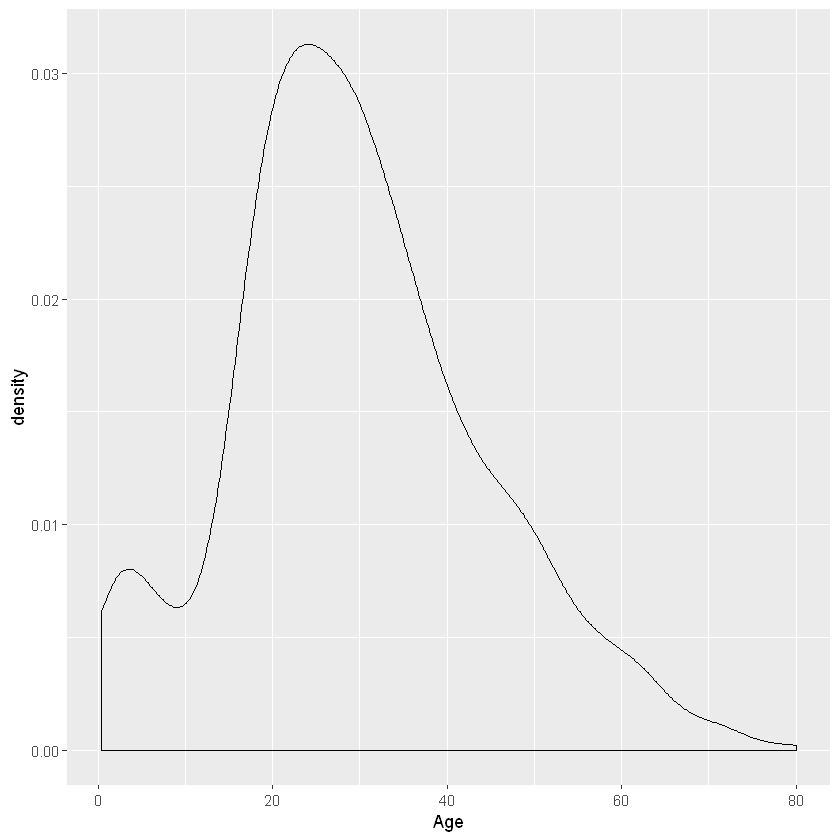

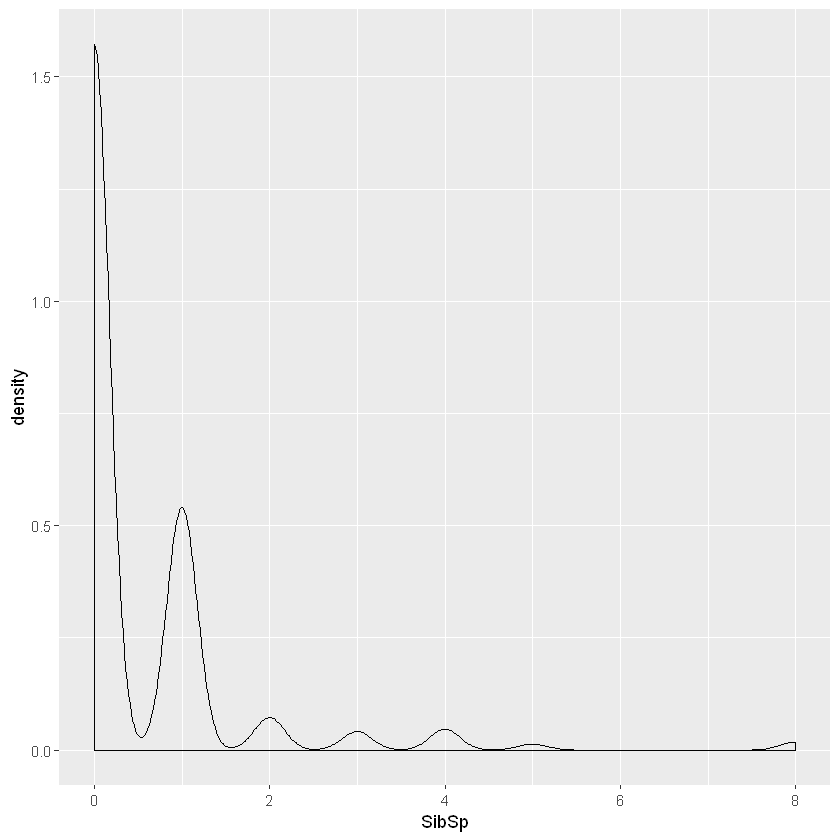

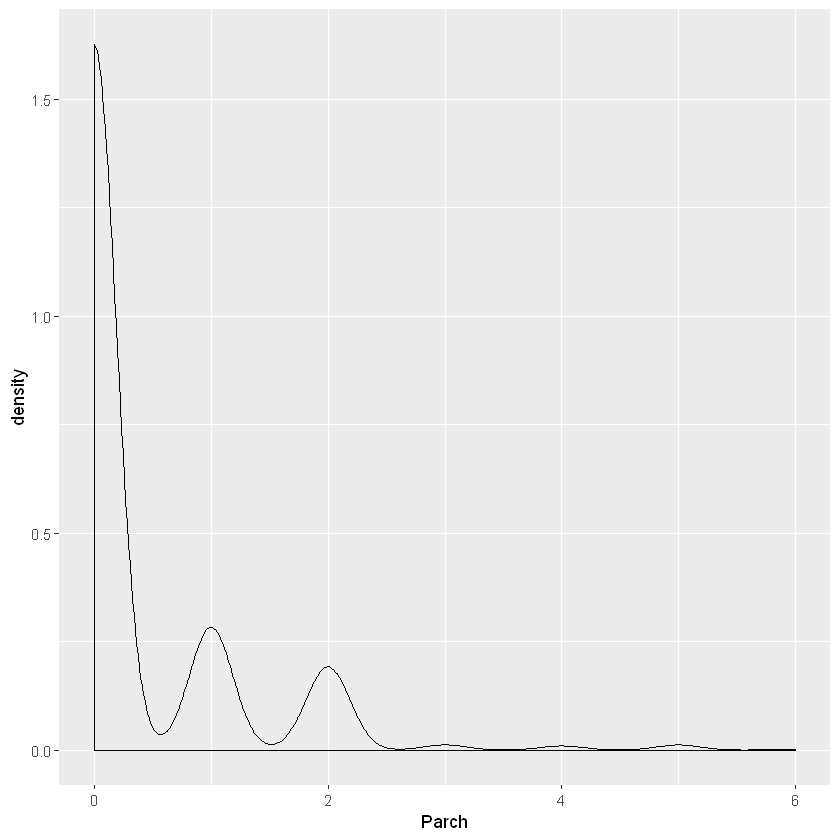

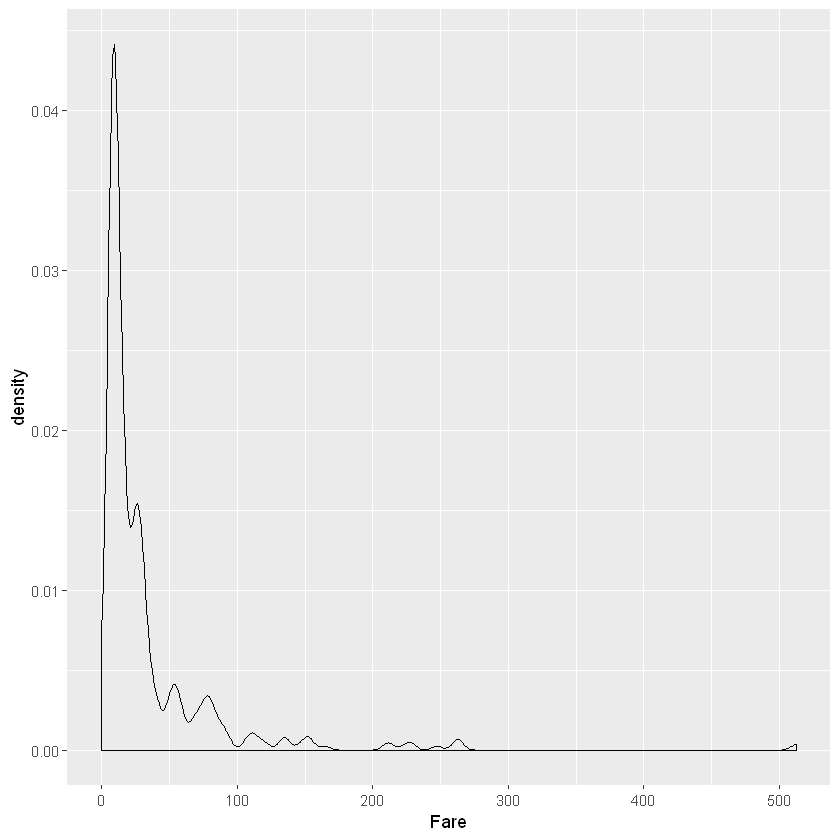

In [9]:
dens_curve=function(x){
  for (i in 1:ncol(x)){
    if (is.numeric(x[,i])){
      print(ggplot(data=x)+geom_density(mapping=aes(x=x[,i]))+xlab(names(x)[i]))
    }
  }
}
dens_curve(titanic)

Write a function that inputs a dataset and output bar charts of all categorical variables

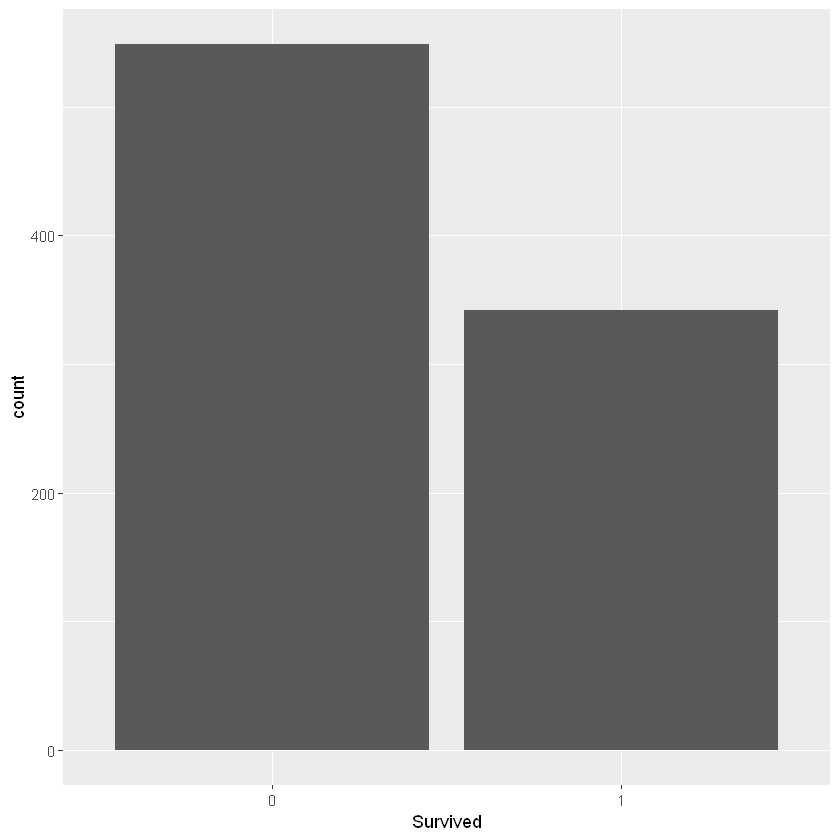

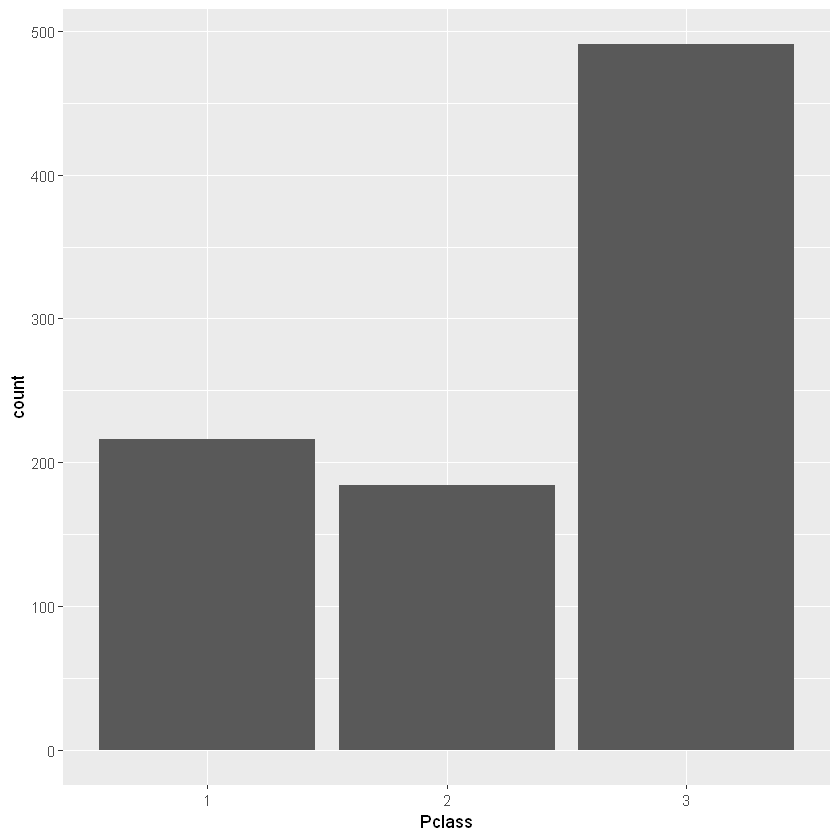

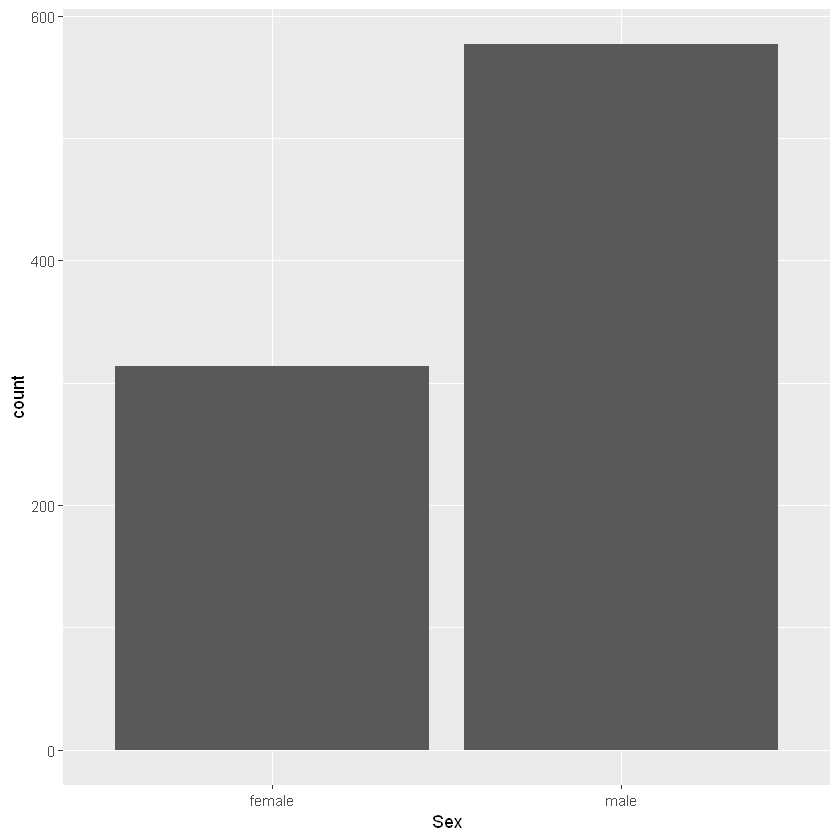

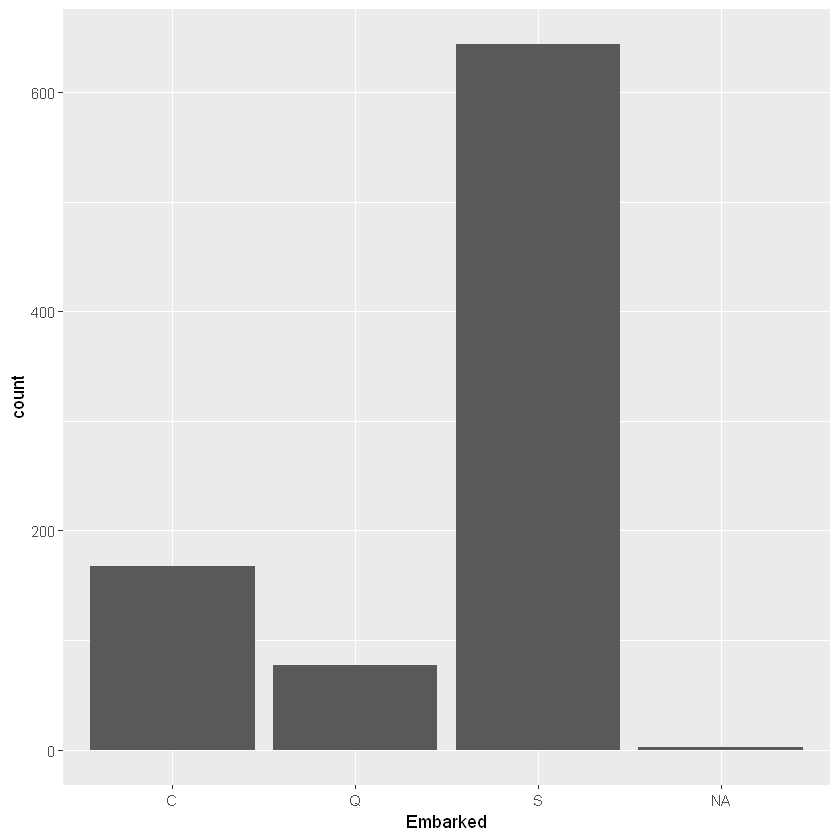

In [10]:
bar_chart=function(x){
  for (i in 1:ncol(x)){
    if (!is.numeric(x[,i])){
      print(ggplot(data=x)+geom_bar(mapping=aes(x=x[,i]))+xlab(names(x)[i]))
    }
  }
}
bar_chart(titanic)

Write a function that inputs a dataset and two number i, j and outputs bar charts of column i and column j.  If either i or j are not categorical variables, output a message saying so

[1] "At least one of the columns is not categorical"


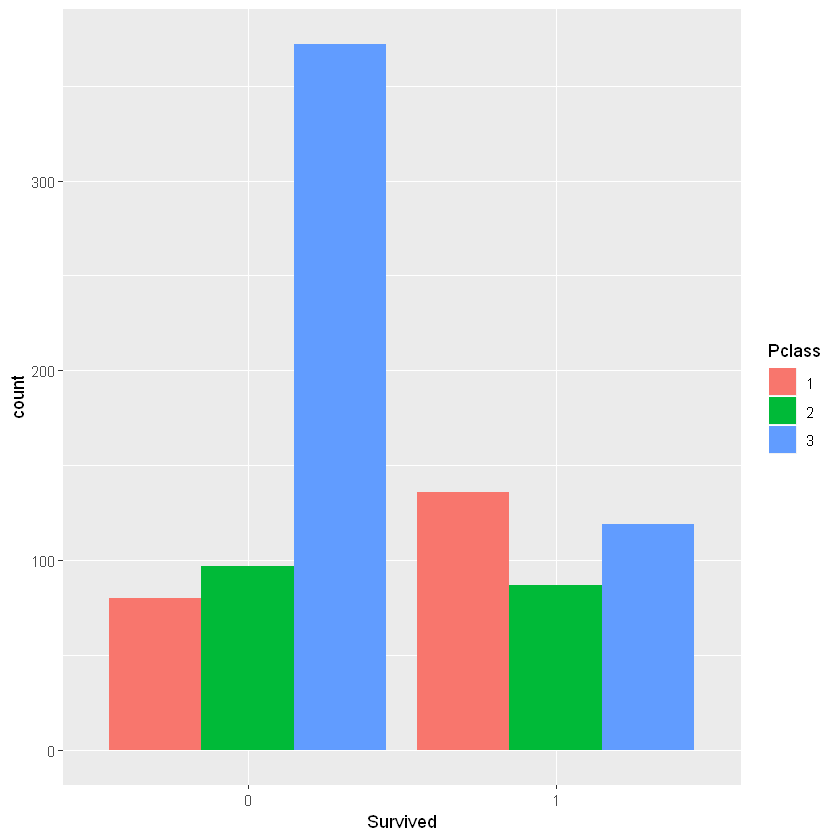

In [11]:
bar_vars=function(x,i,j){
  if(is.numeric(x[,i]) | is.numeric(x[,j])){
    print("At least one of the columns is not categorical")
  }else{
    print(ggplot(data=x)+geom_bar(mapping=aes(x=x[,i],fill=x[,j]),position="dodge")+labs(x=names(x)[i],fill=names(x)[j]))
  }
}
bar_vars(titanic,1,4)
bar_vars(titanic,1,2)

Write a function that inputs a dataset and two number i, j and outputs the scatter plot of column i and column j. If either i or j are not numeric variables, output a message saying so

Warning message:
"Removed 177 rows containing missing values (geom_point)."

[1] "At least one of the columns is not numeric"


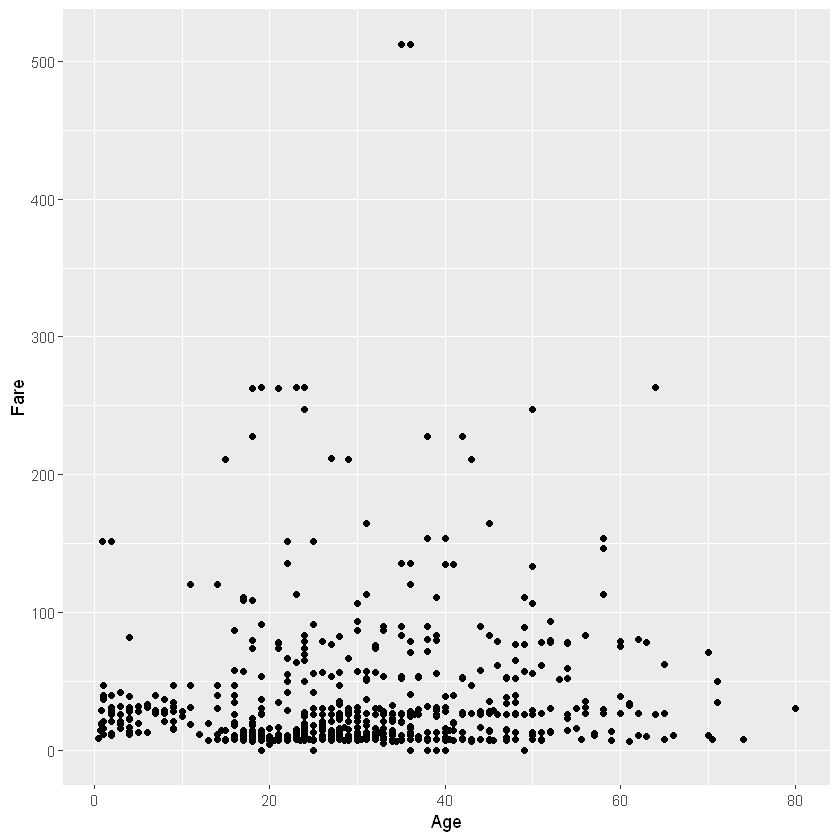

In [12]:
scatter_vars=function(x,i,j){
  if(!is.numeric(x[,i]) | !is.numeric(x[,j])){
    print("At least one of the columns is not numeric")
  }else{
    print(ggplot(data=x)+geom_point(mapping=aes(x=x[,i],y=x[,j]))+labs(x=names(x)[i],y=names(x)[j]))
  }
}
scatter_vars(titanic,4,7)
scatter_vars(titanic,4,2)

Write a function that inputs a dataset and two number i, j and output the density curves of column i partitioning on categories of column j. If the two columns are not suitable for the graph, print out the message saying so. 

[1] "The input variable is not numeric"
[1] "The partitioning variable is not categorical"


Warning message:
"Removed 177 rows containing non-finite values (stat_density)."

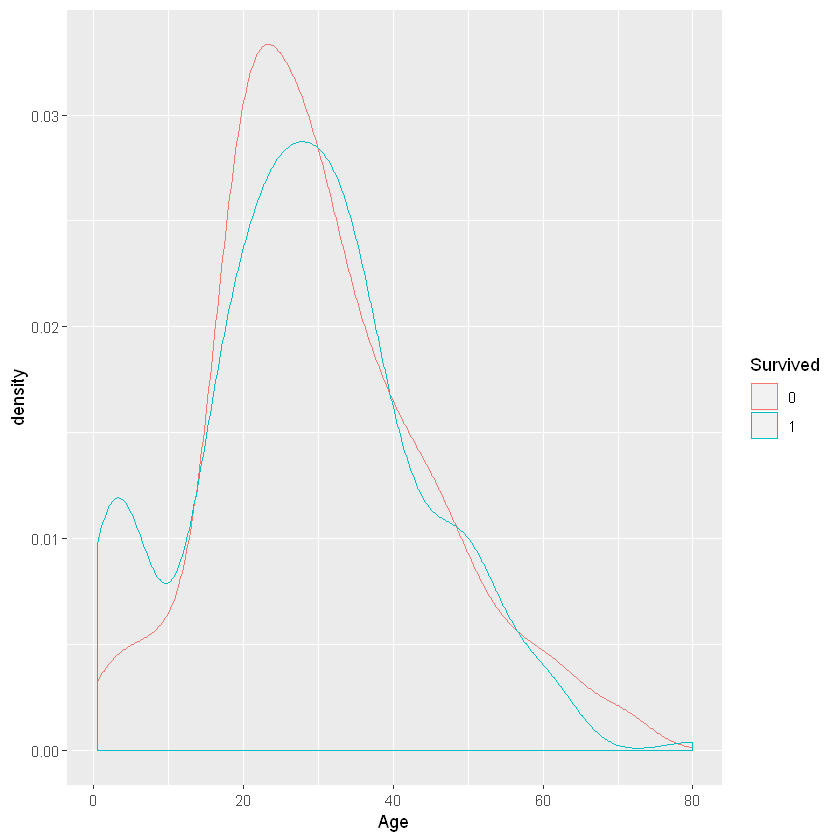

In [13]:
density_vars=function(x,i,j){
  if(!is.numeric(x[,i])){
    print("The input variable is not numeric")
  }else if(is.numeric(x[,j])){
    print("The partitioning variable is not categorical")
  }else{
    print(ggplot(data=x)+geom_density(mapping=aes(x=x[,i],color=x[,j]))+labs(x=names(x)[i],color=names(x)[j]))
  }
}
density_vars(titanic,1,2)
density_vars(titanic,4,5)
density_vars(titanic,4,1)

Write a function that inputs a dataset and output all possible bar charts of pair of variables in the dataset.

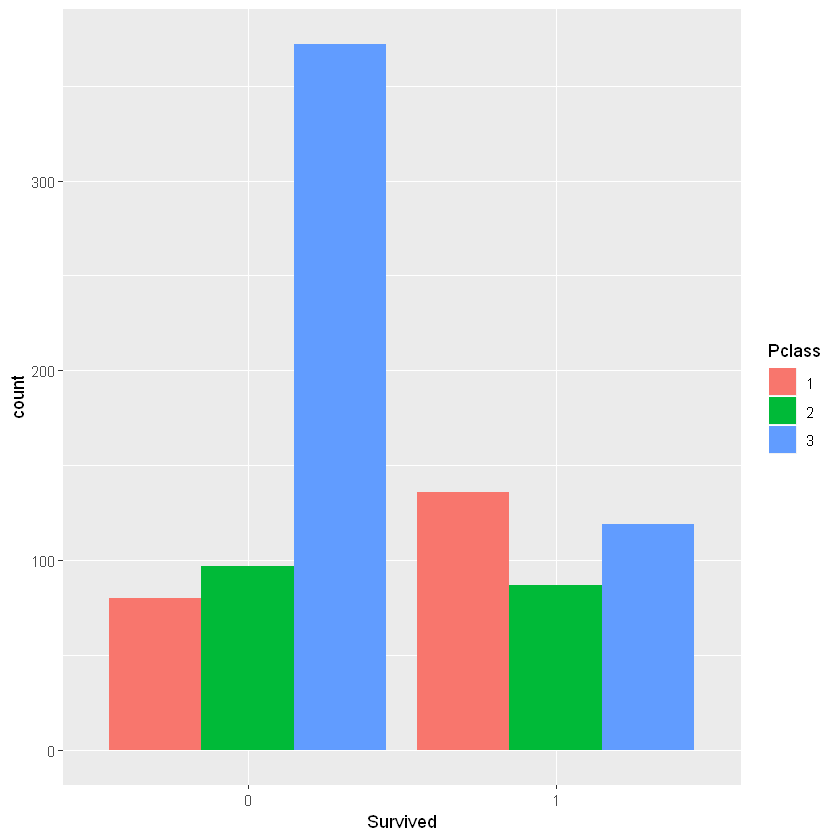

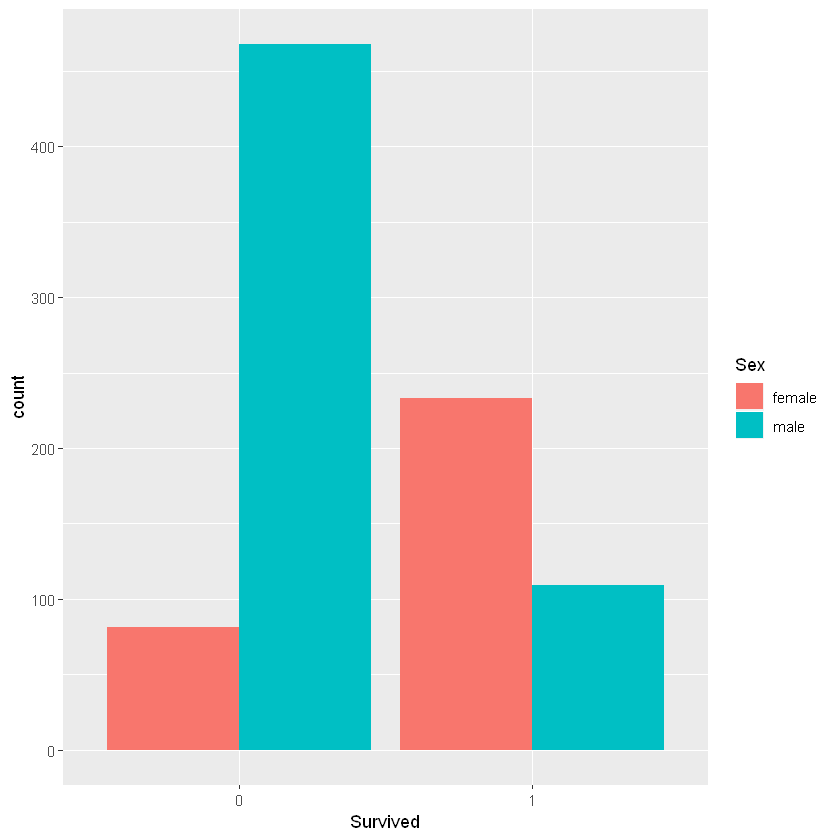

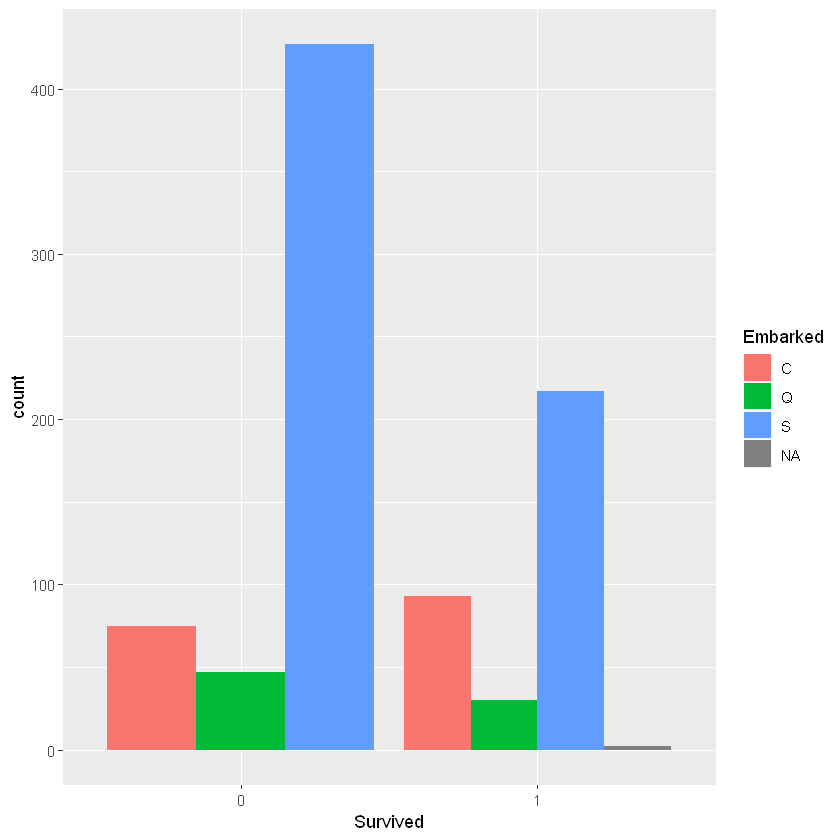

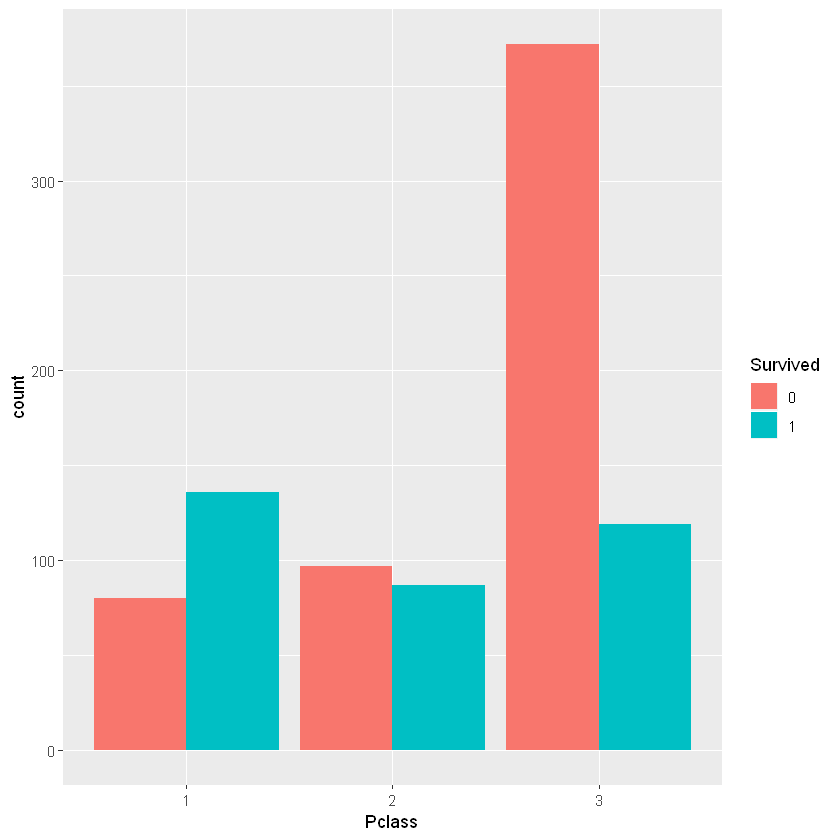

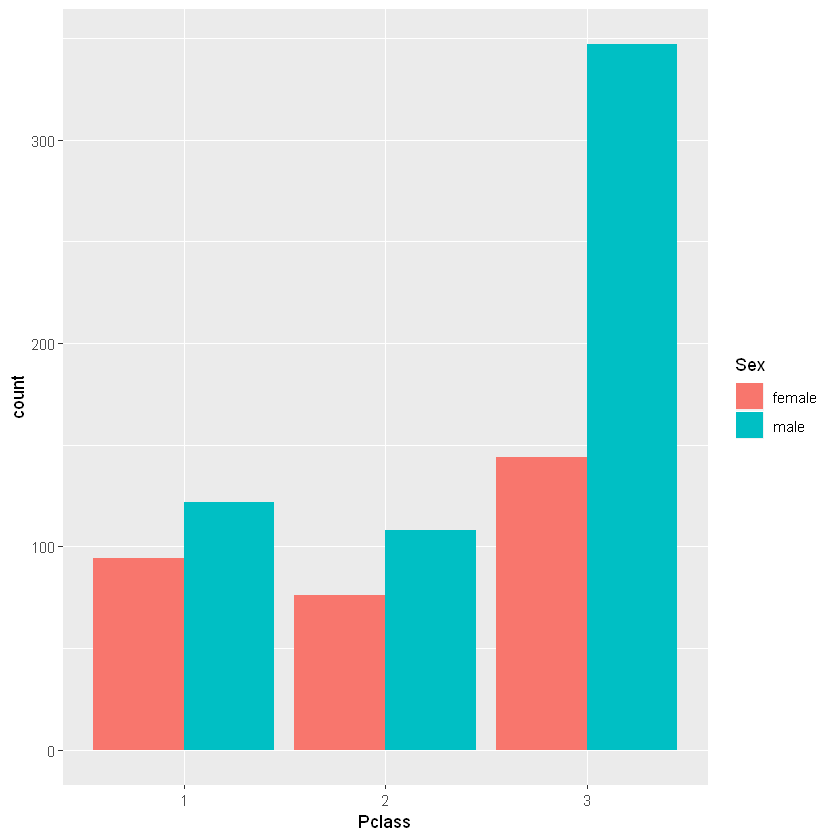

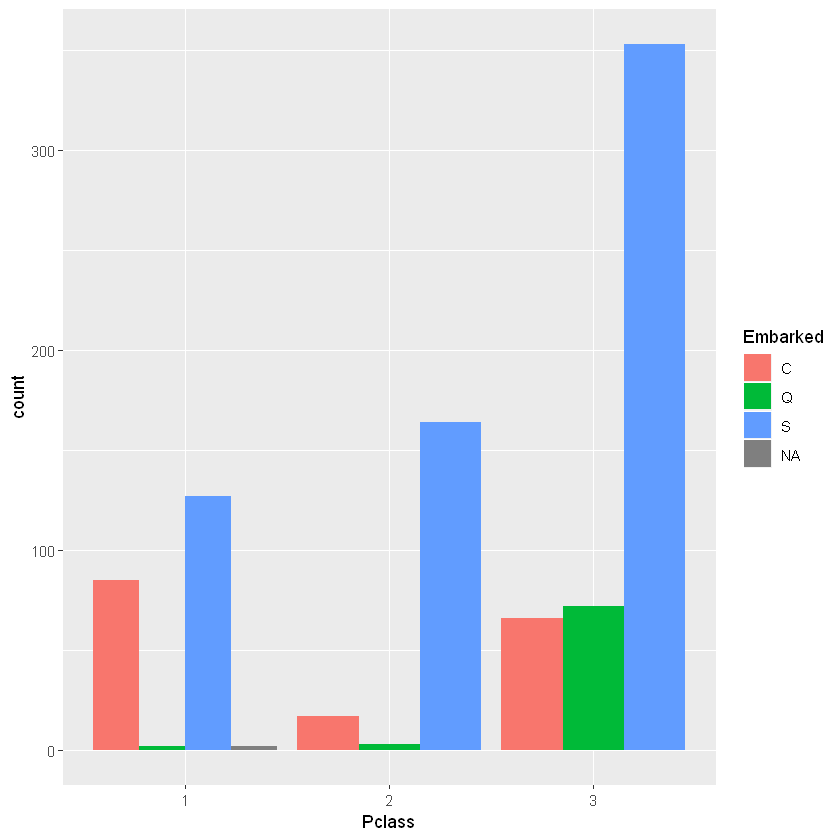

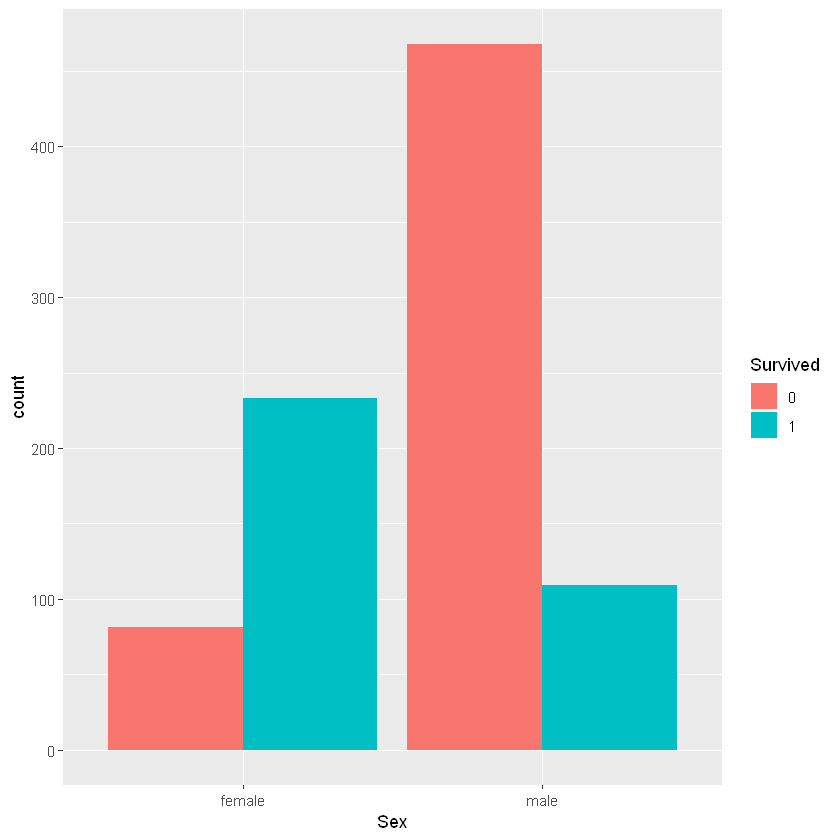

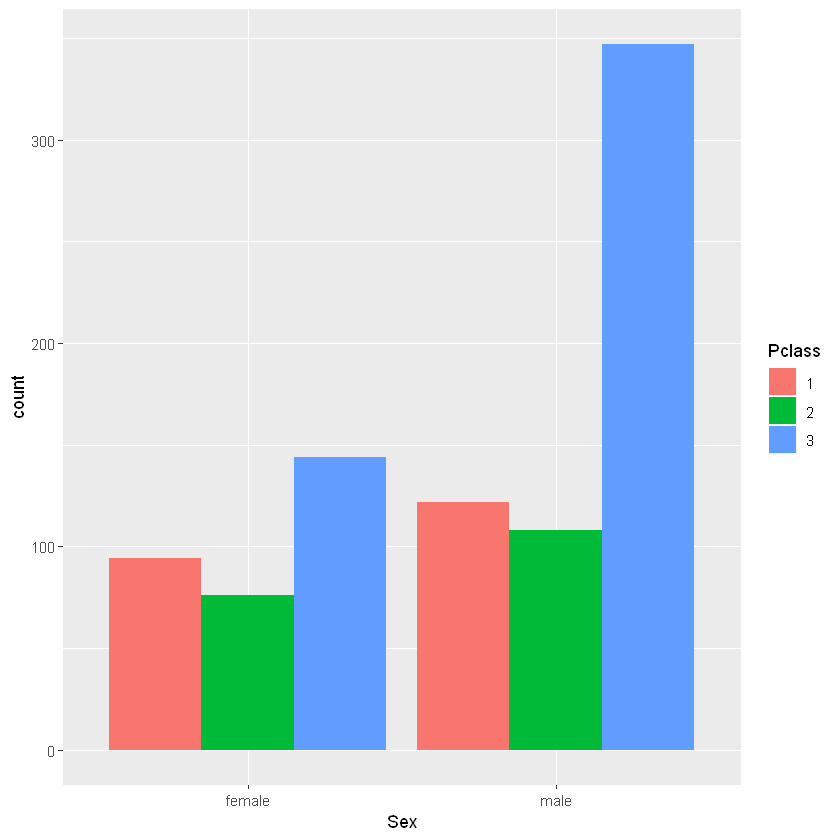

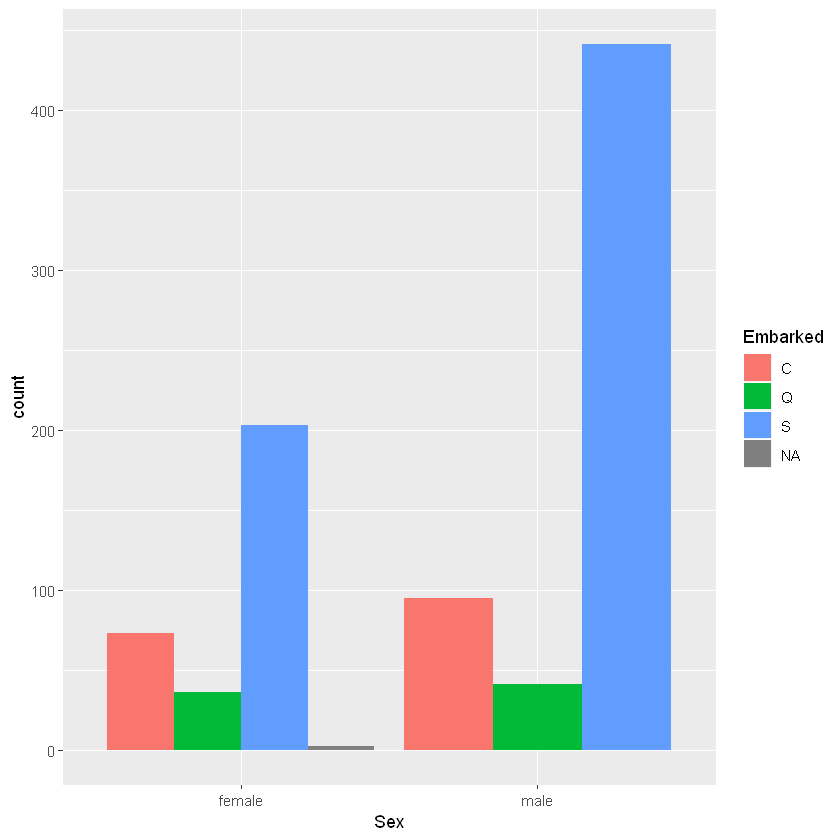

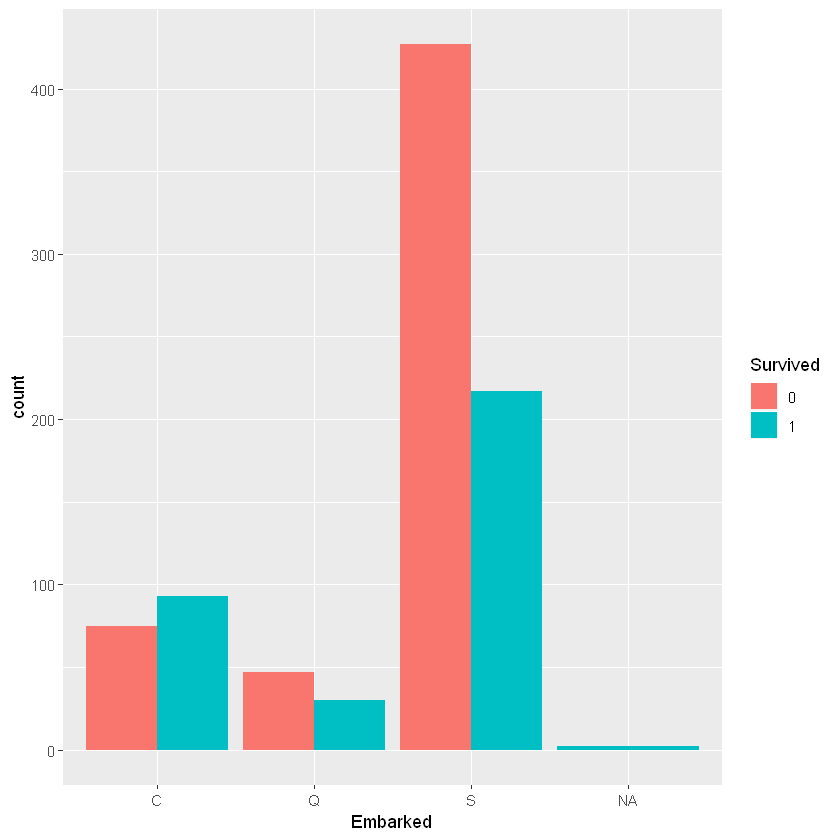

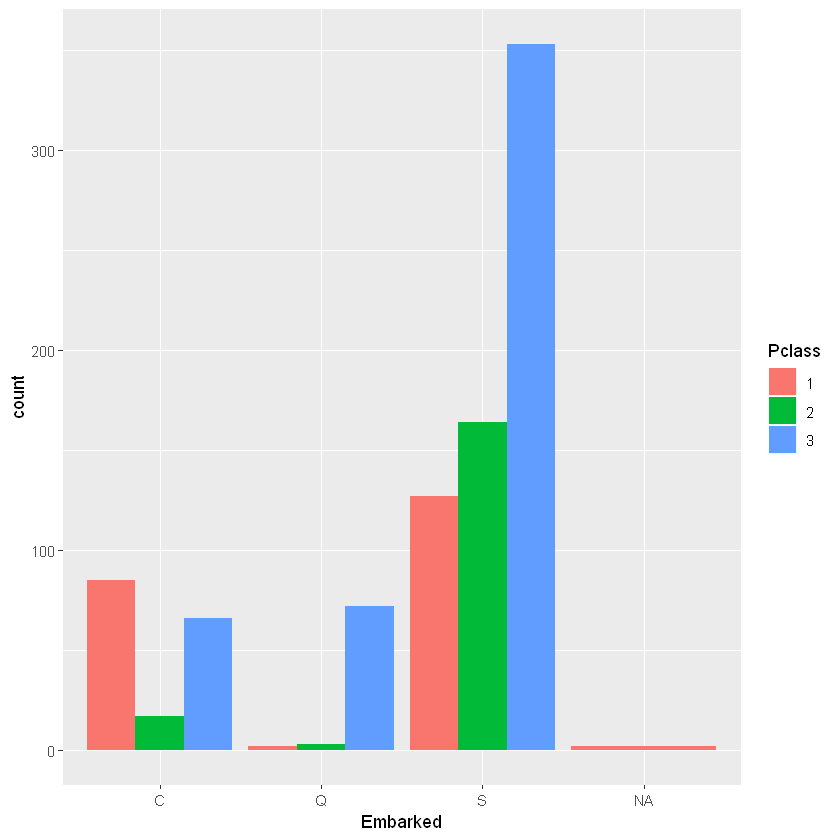

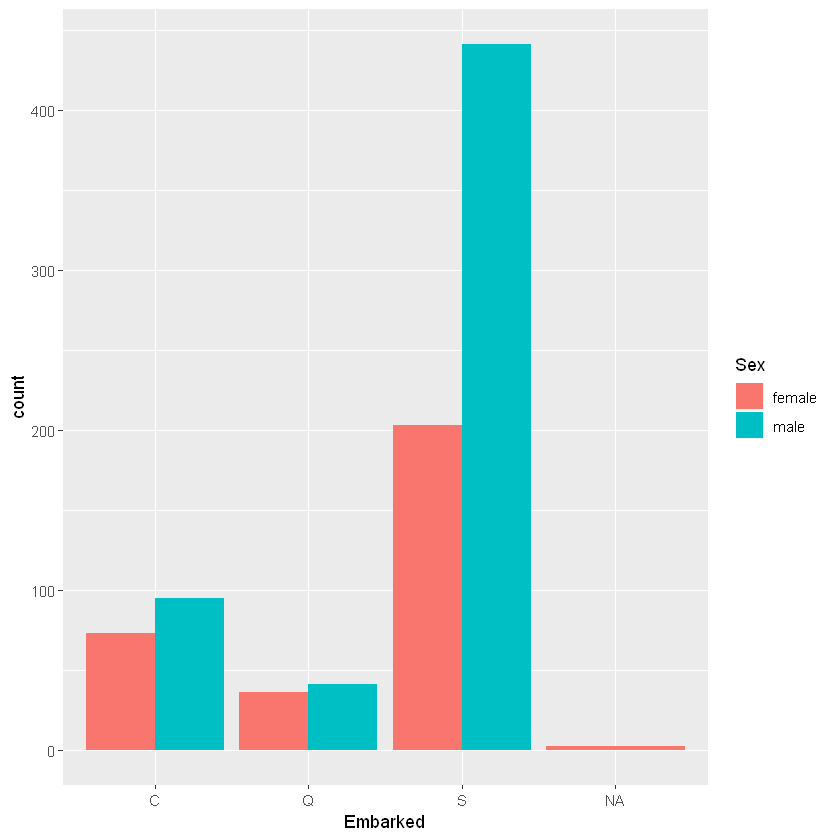

In [14]:
all_bars=function(x){
    for (i in 1:ncol(x)){
      if (!is.numeric(x[,i])){
        for(j in 1:ncol(x)){
          if (!is.numeric(x[,j]) & names(x)[j]!=names(x)[i]){
            print(ggplot(data=x)+geom_bar(mapping=aes(x=x[,i],fill=x[,j]),position="dodge")+ labs(x=names(x)[i],fill=names(x)[j]))
          }
        }
      }
    }
}
all_bars(titanic)

Write a function that inputs a dataset and output all possible density curves of variables in the dataset.

Warning message:
"Removed 177 rows containing non-finite values (stat_density)."Warning message:
"Removed 177 rows containing non-finite values (stat_density)."

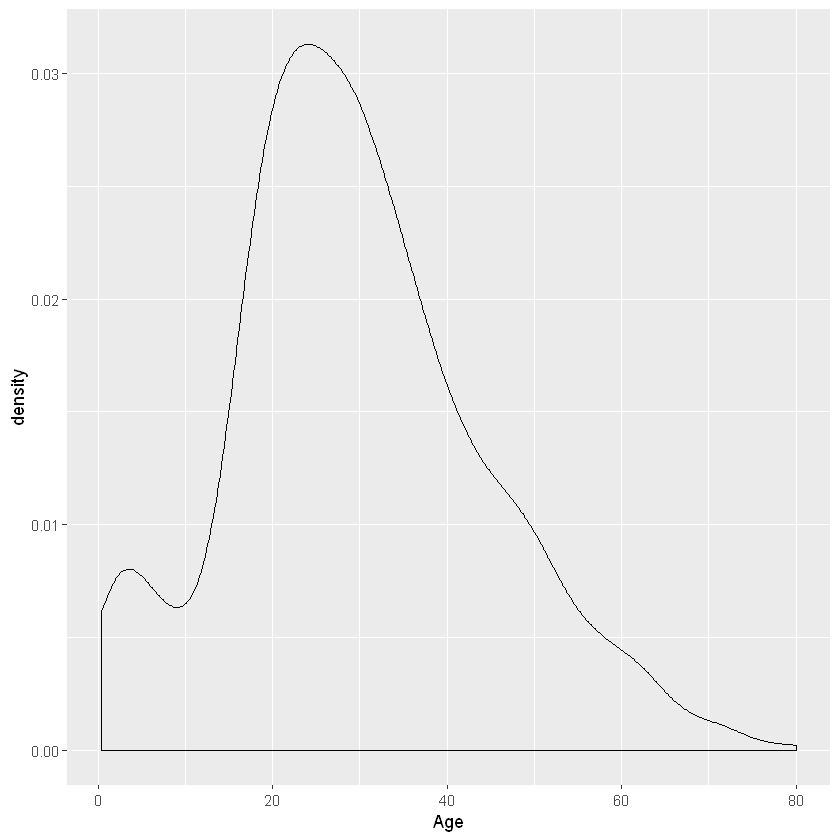

Warning message:
"Removed 177 rows containing non-finite values (stat_density)."

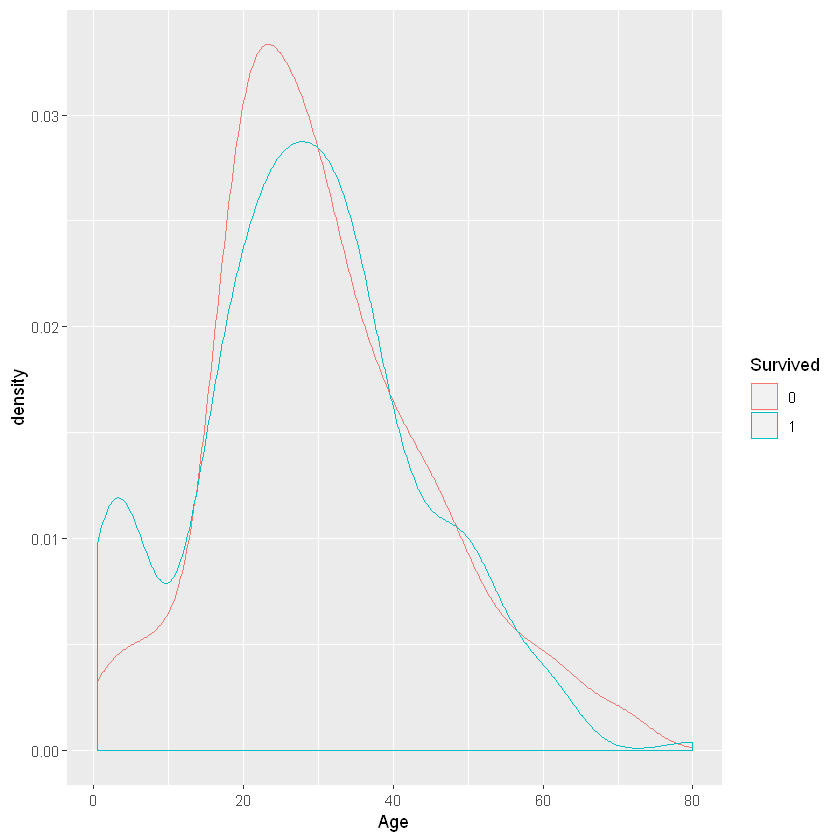

Warning message:
"Removed 177 rows containing non-finite values (stat_density)."

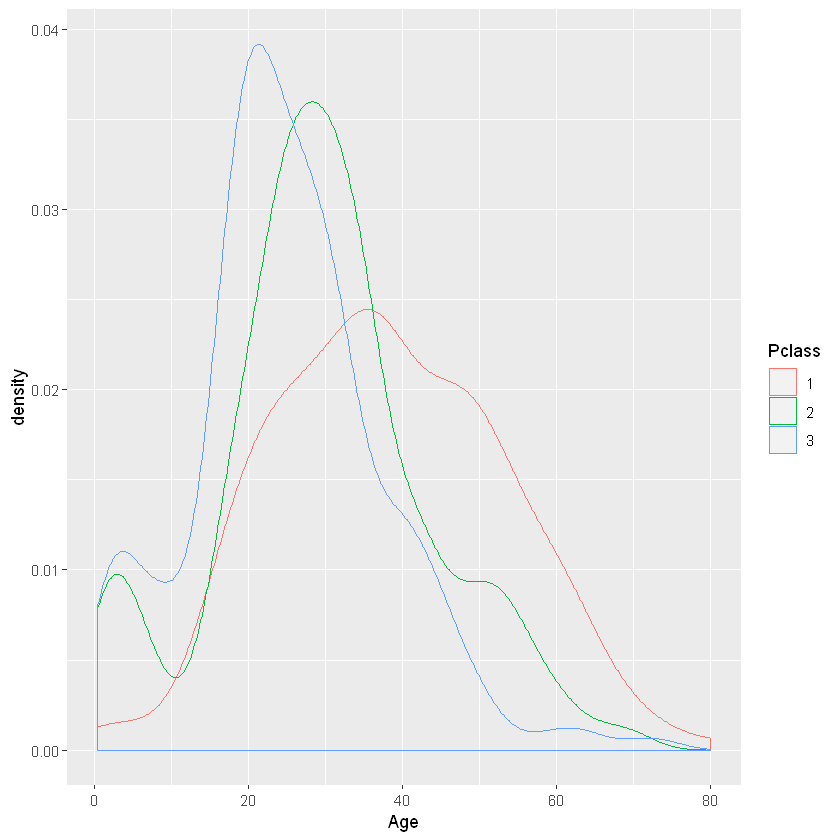

Warning message:
"Removed 177 rows containing non-finite values (stat_density)."

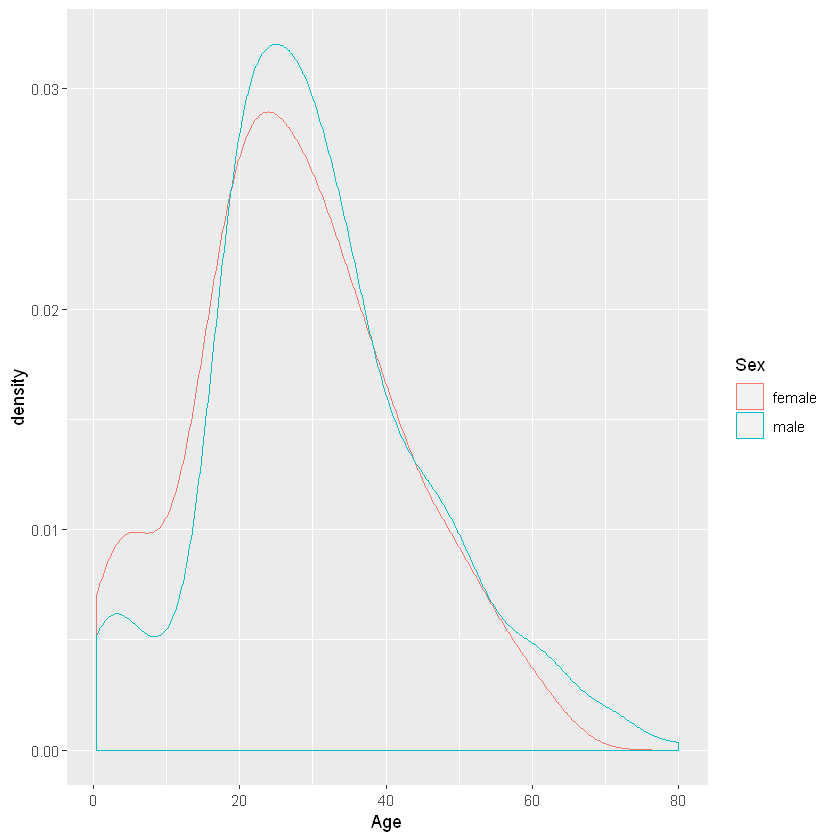

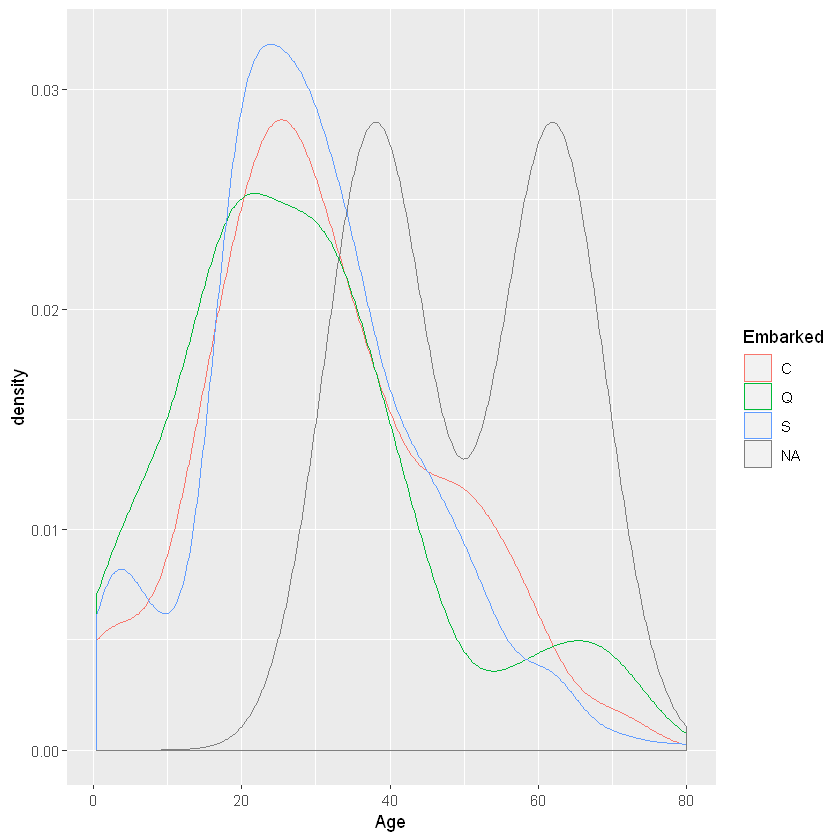

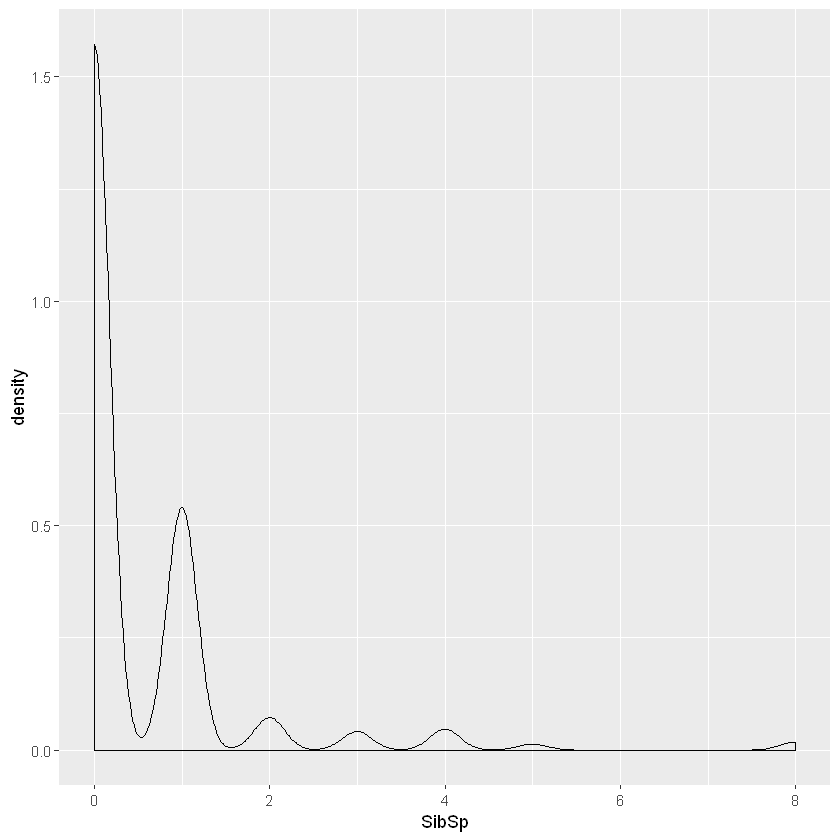

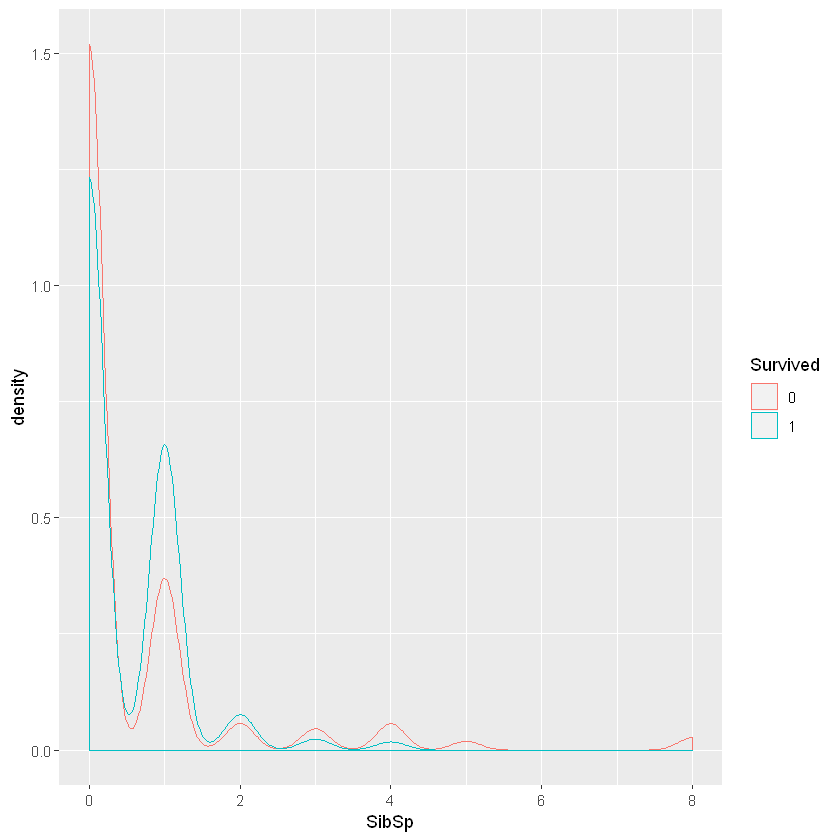

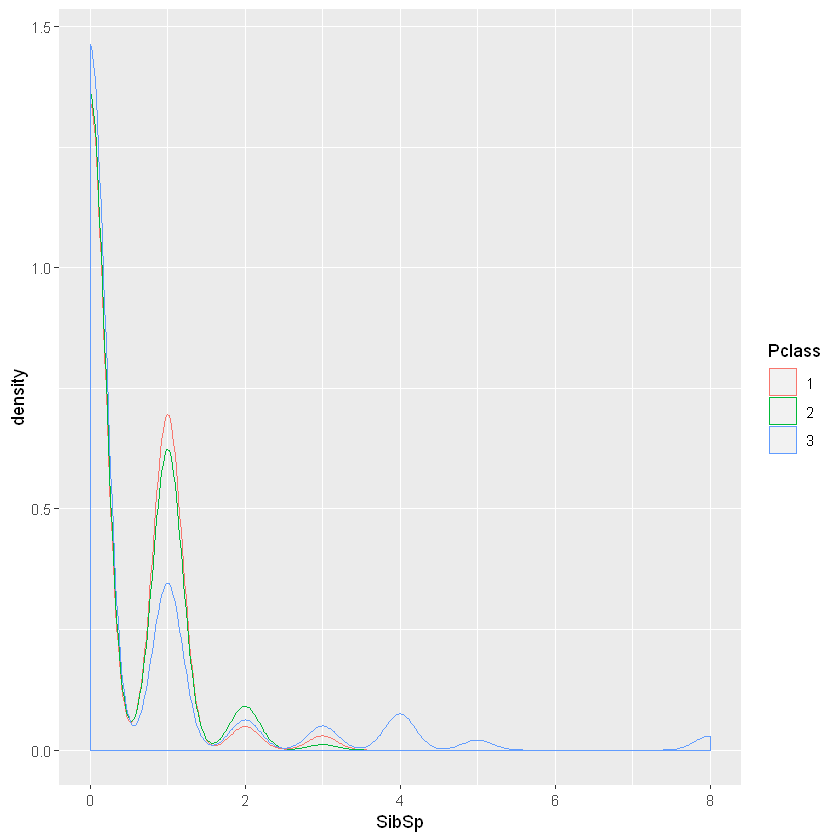

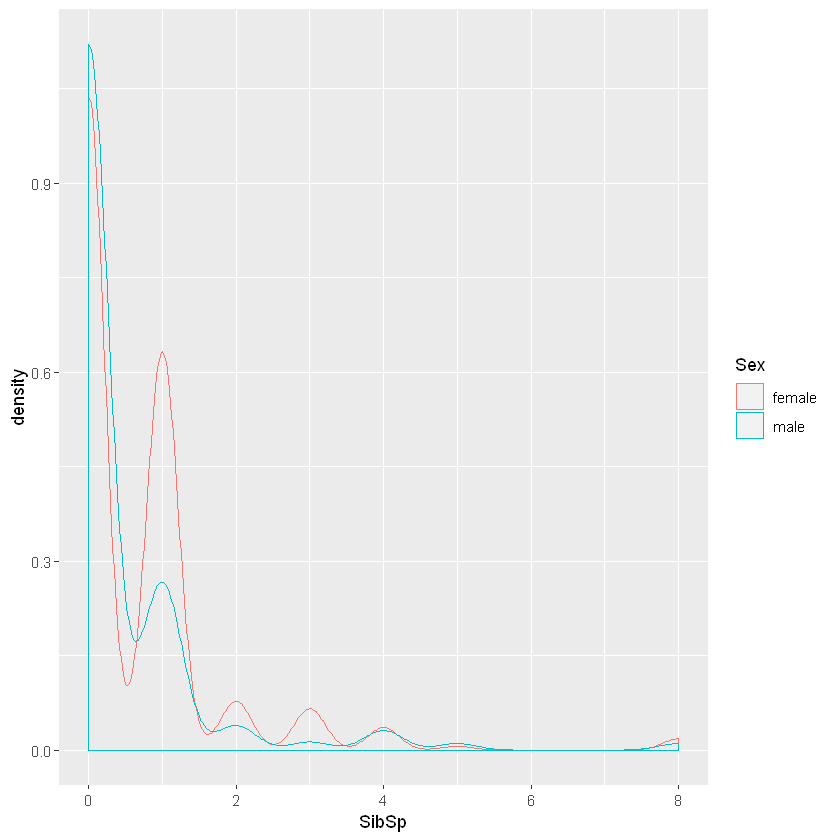

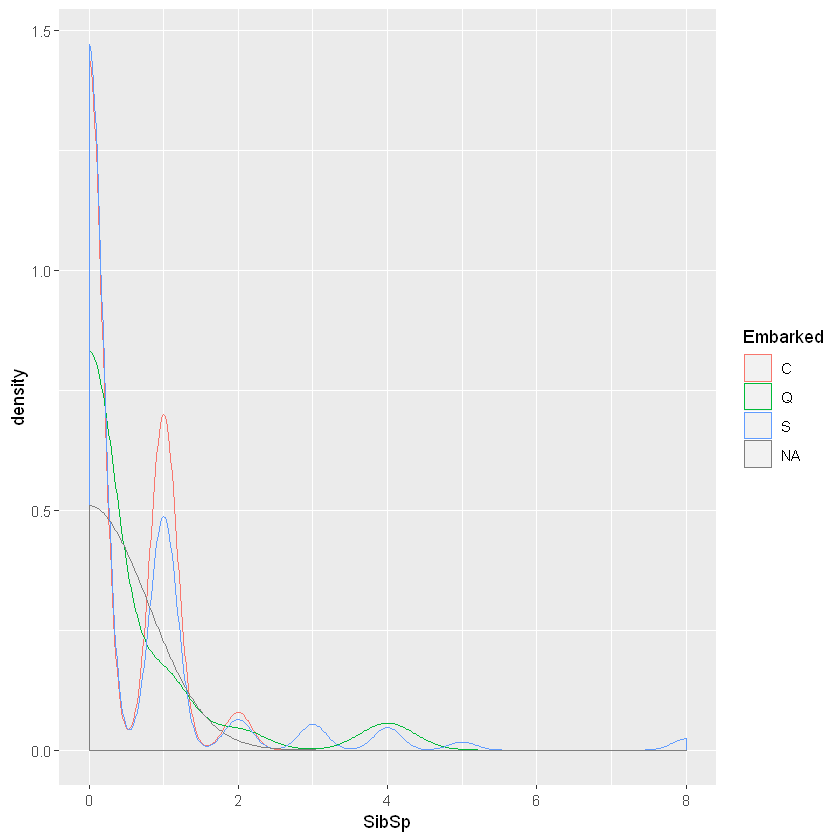

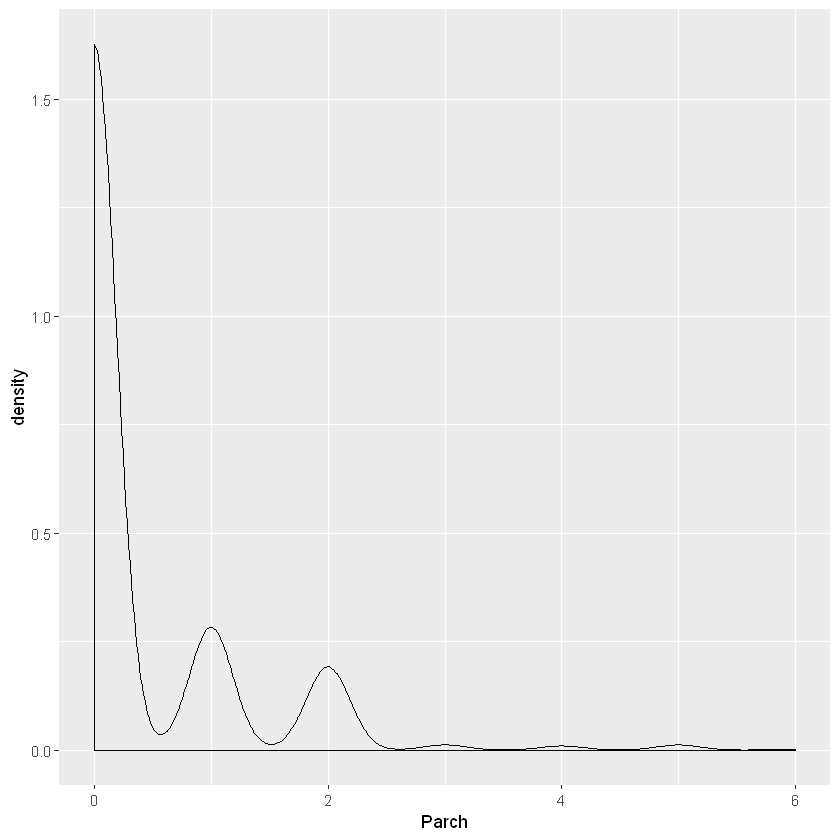

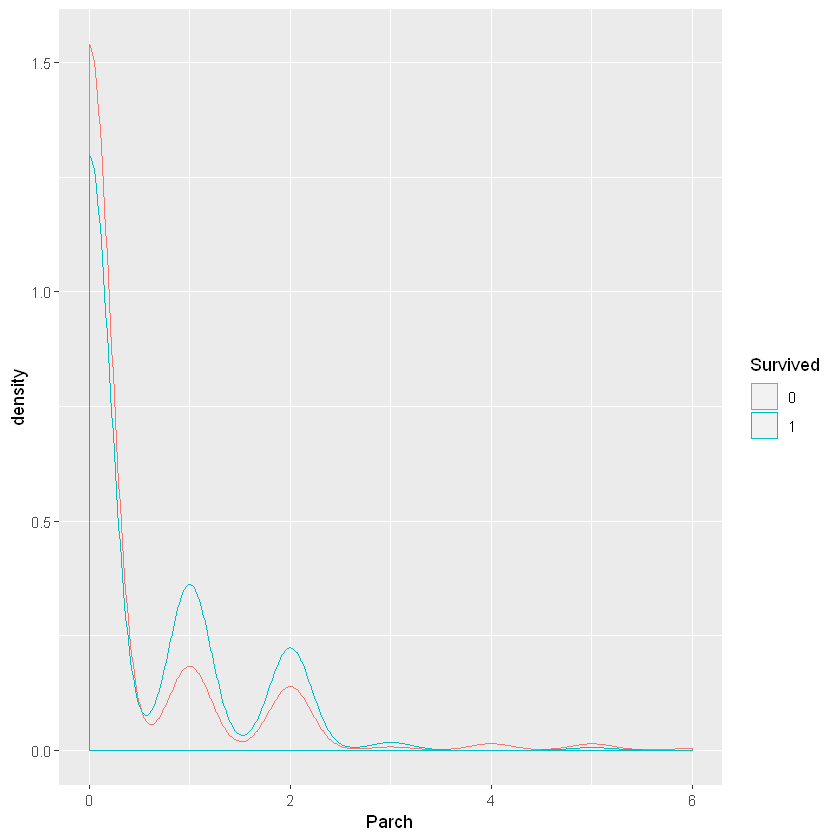

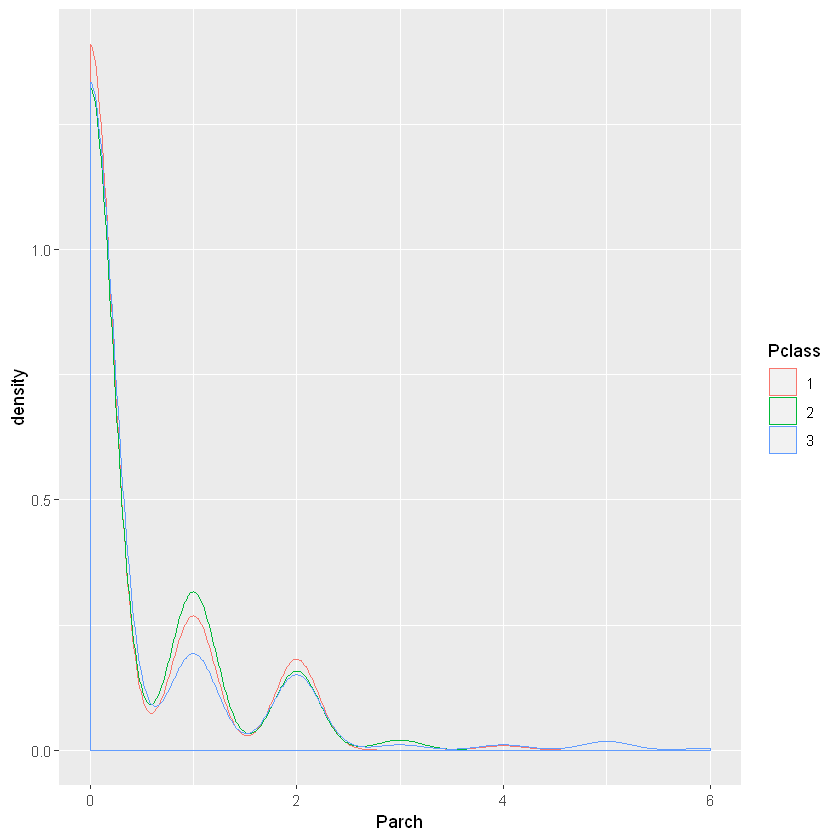

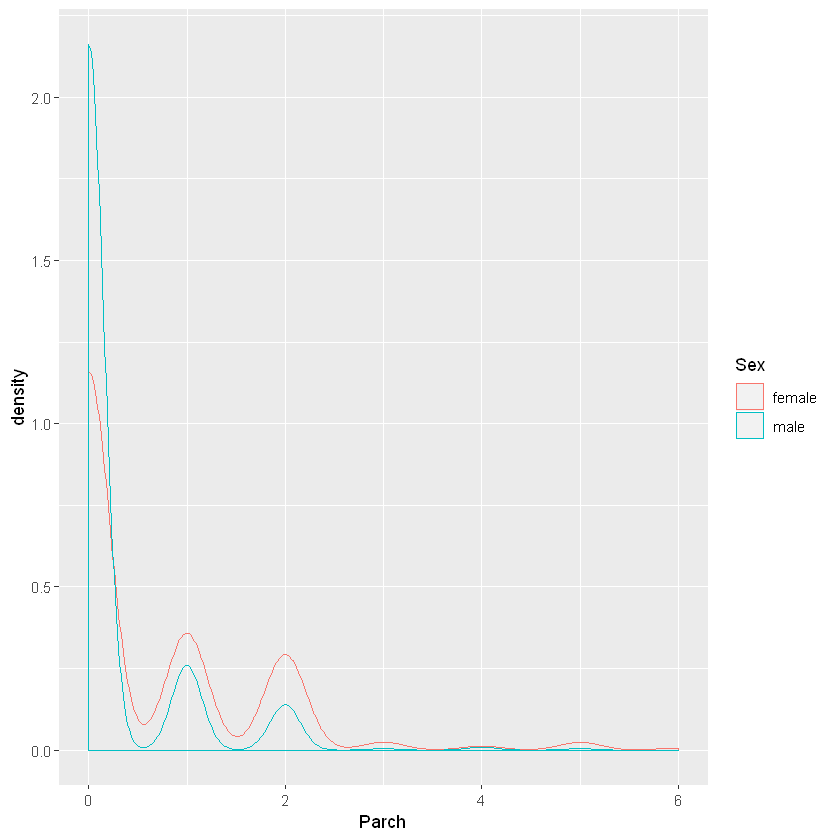

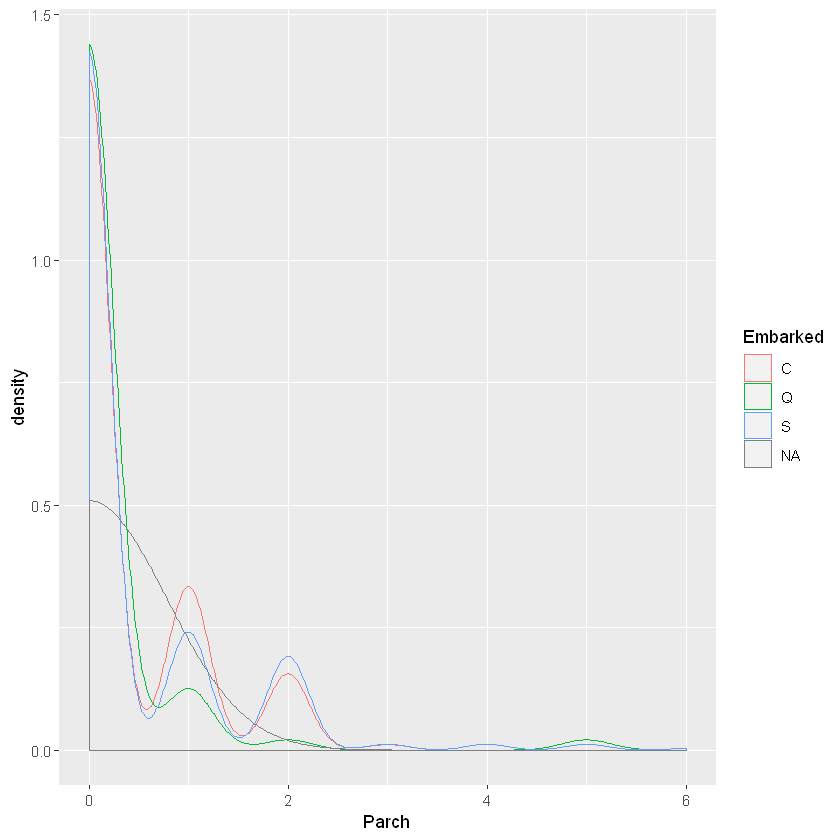

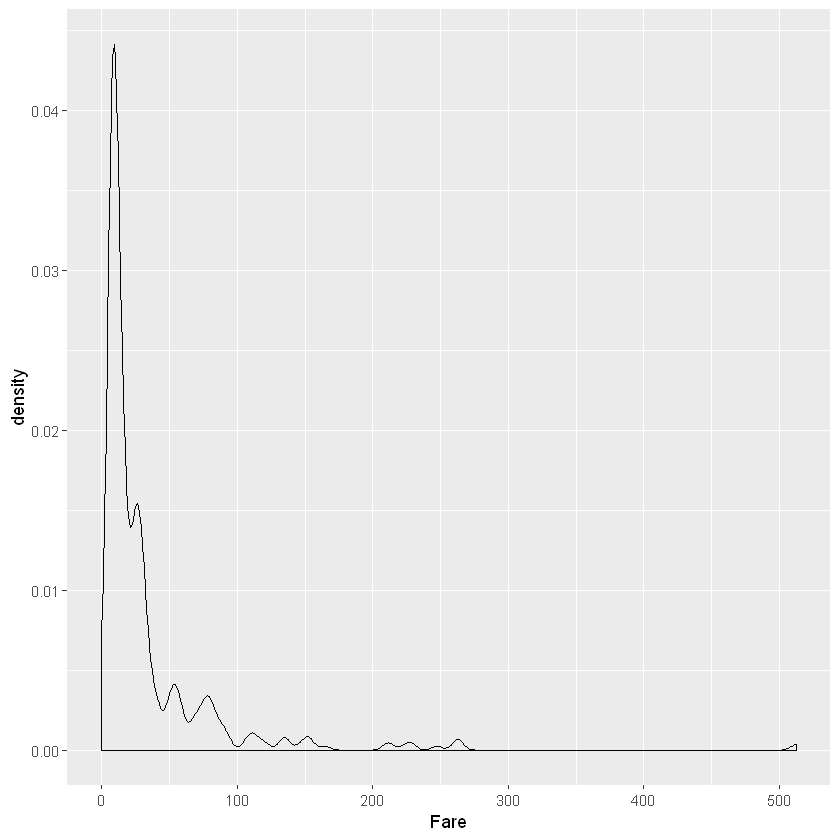

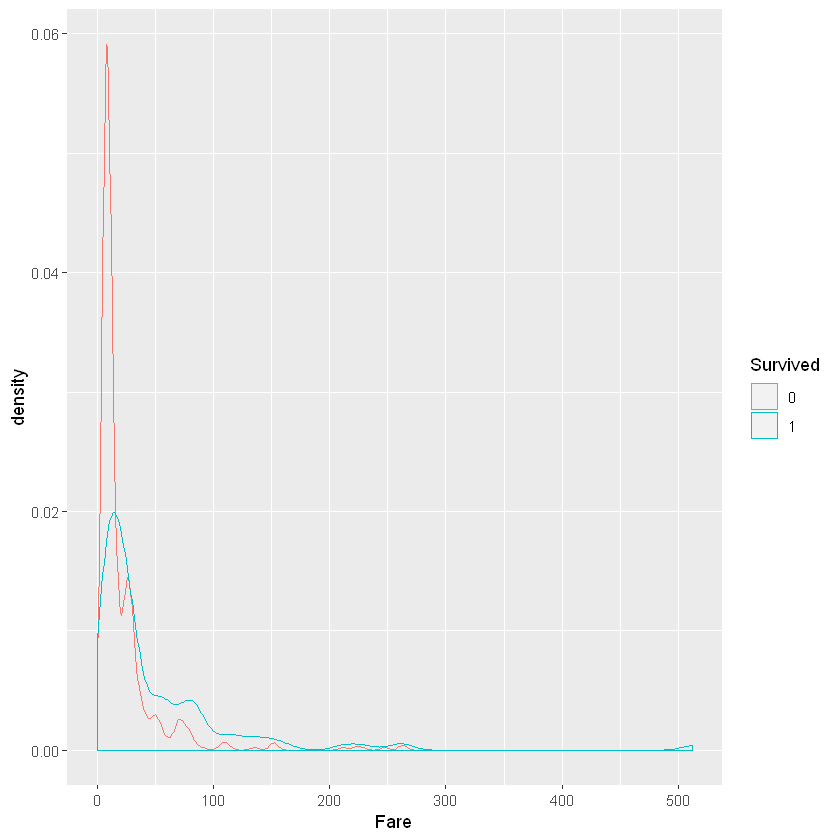

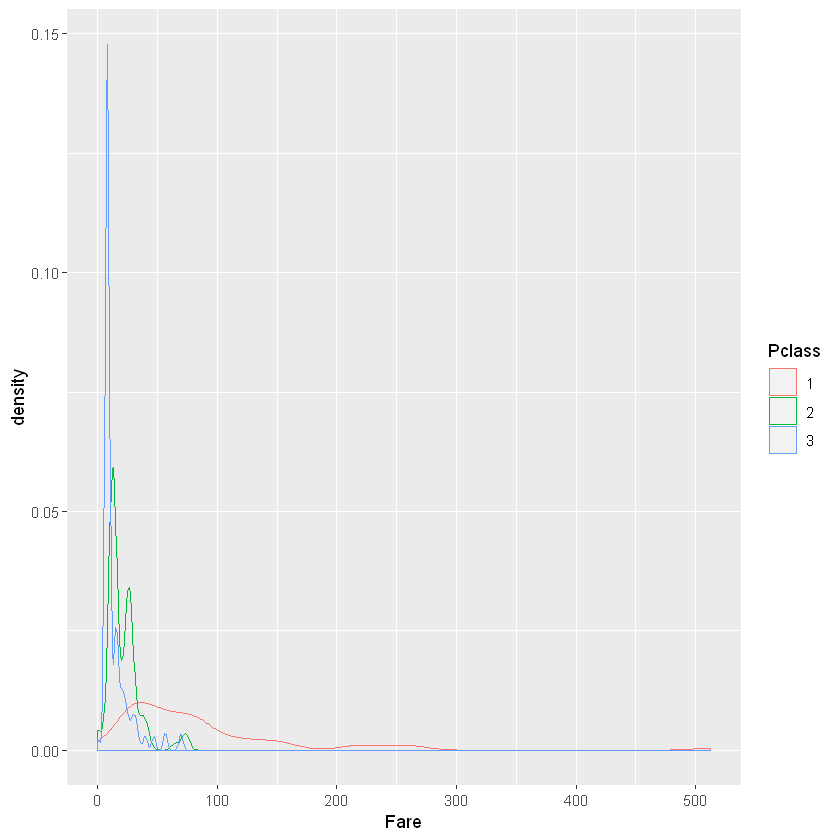

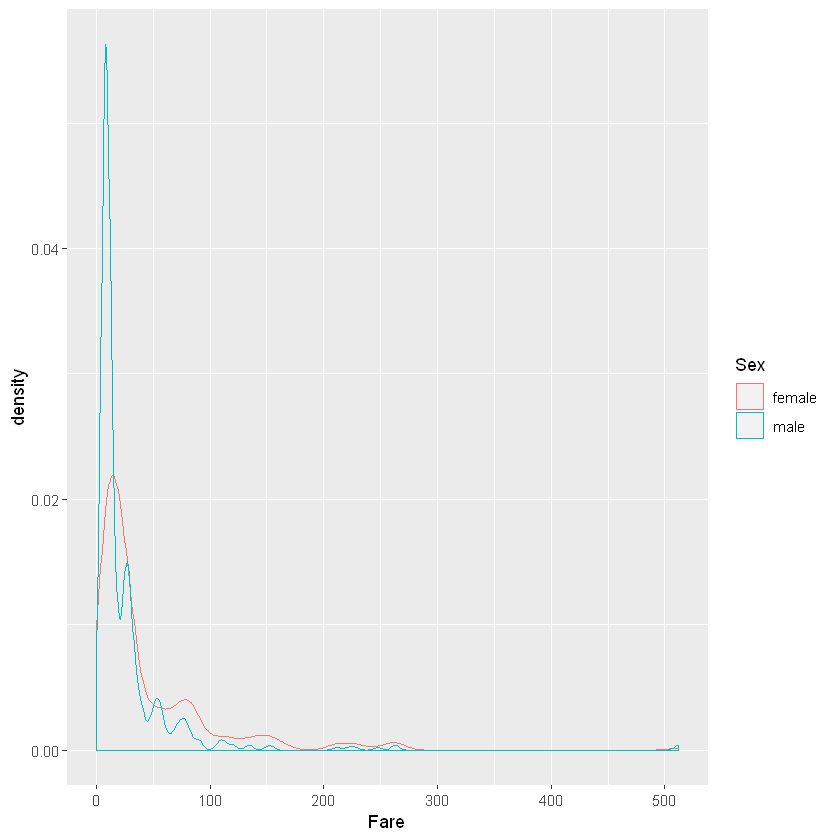

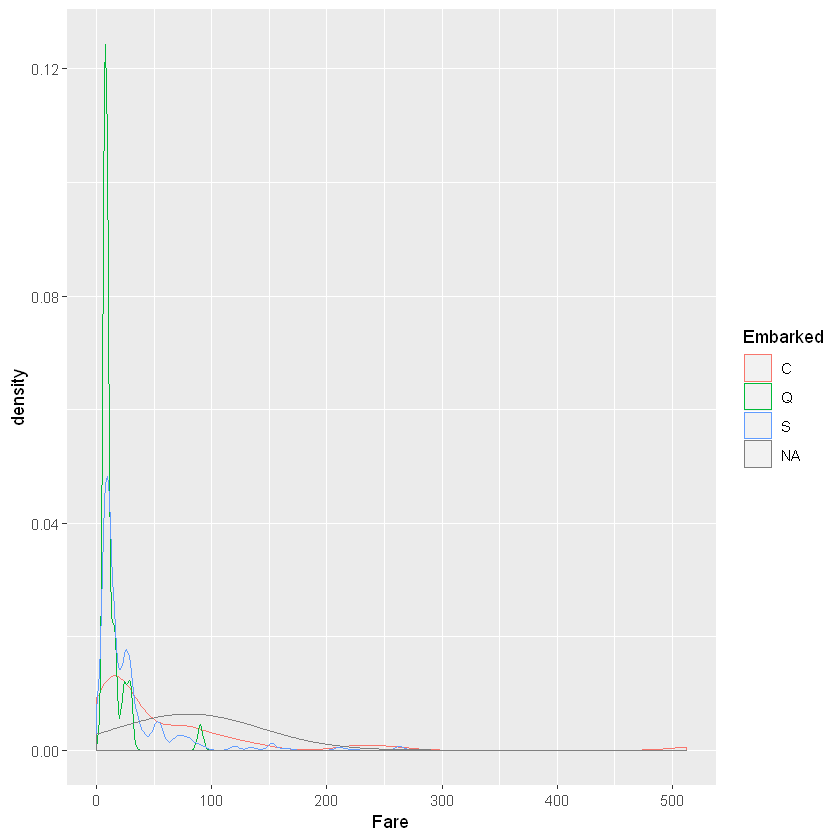

In [15]:
all_density=function(x){
  for (i in 1:ncol(x)){
      if (is.numeric(x[,i])){
        print(ggplot(data=x)+geom_density(mapping=aes(x=x[,i]))+xlab(names(x)[i]))
        for(j in 1:ncol(x)){
          if (!is.numeric(x[,j])){
            print(ggplot(data=x)+geom_density(mapping=aes(x=x[,i],color=x[,j]))+labs(x=names(x)[i],color=names(x)[j]))
          }
        }
      }
    }
}
all_density(titanic)

Write a function that does visualization of a dataset, i.e. the function should output a set of several graphs of the variables

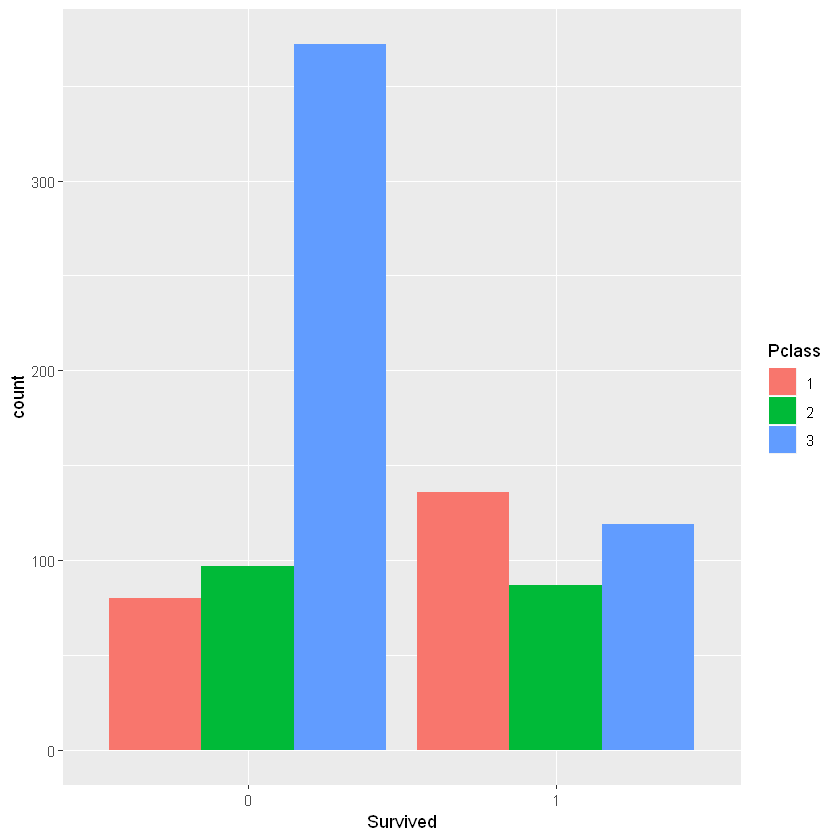

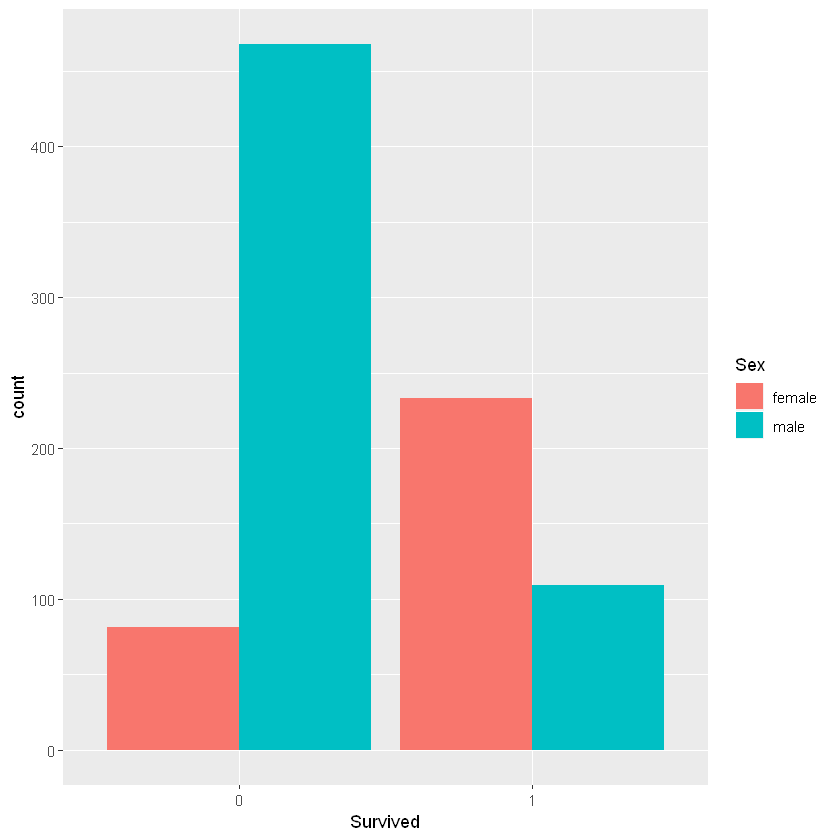

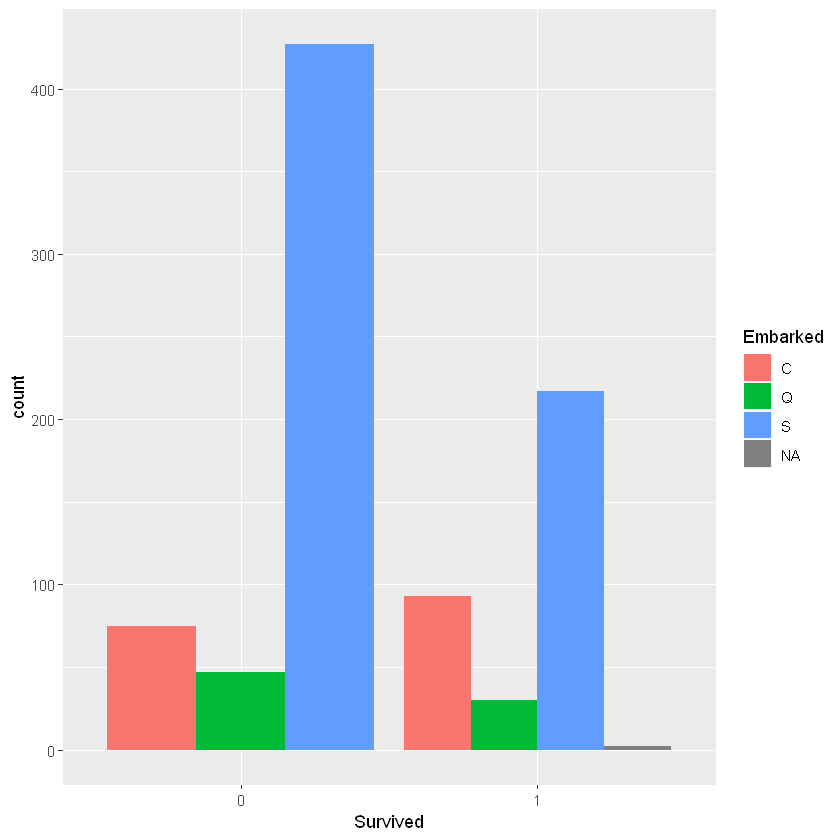

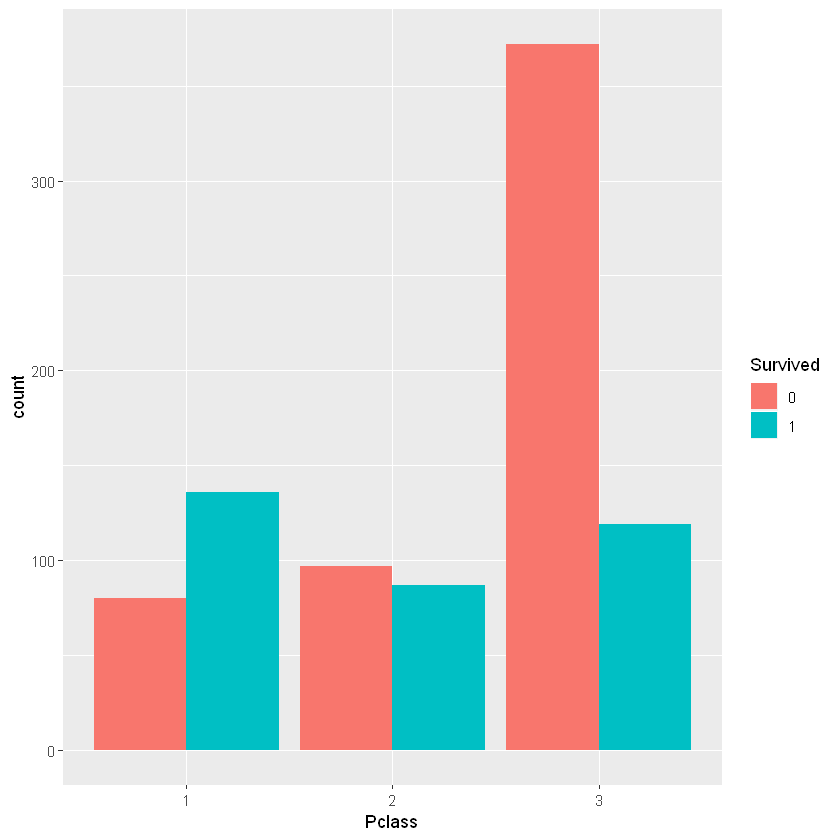

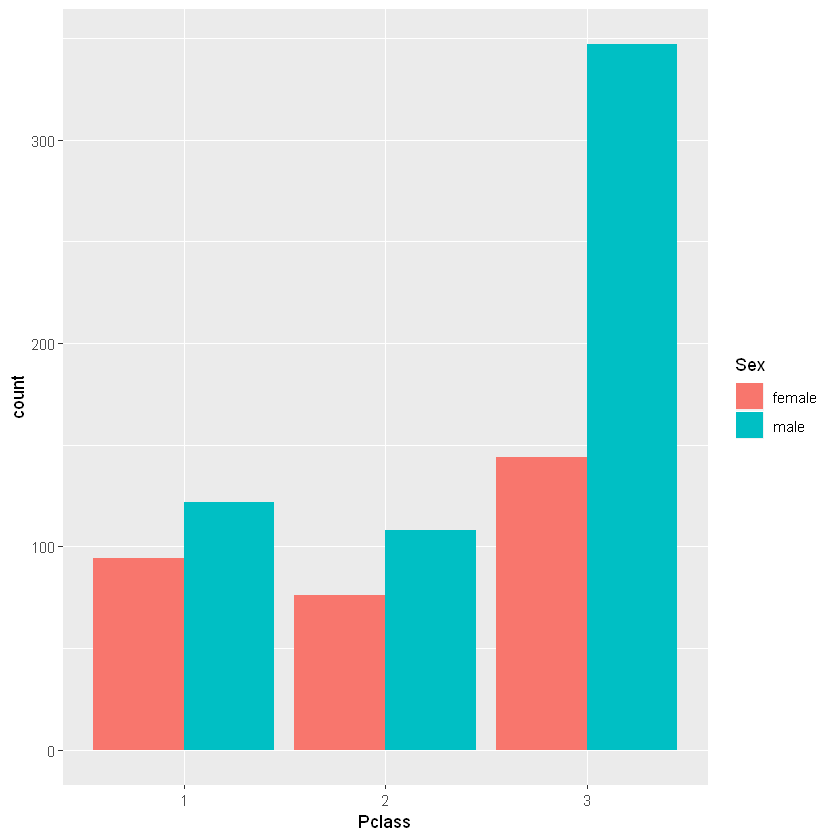

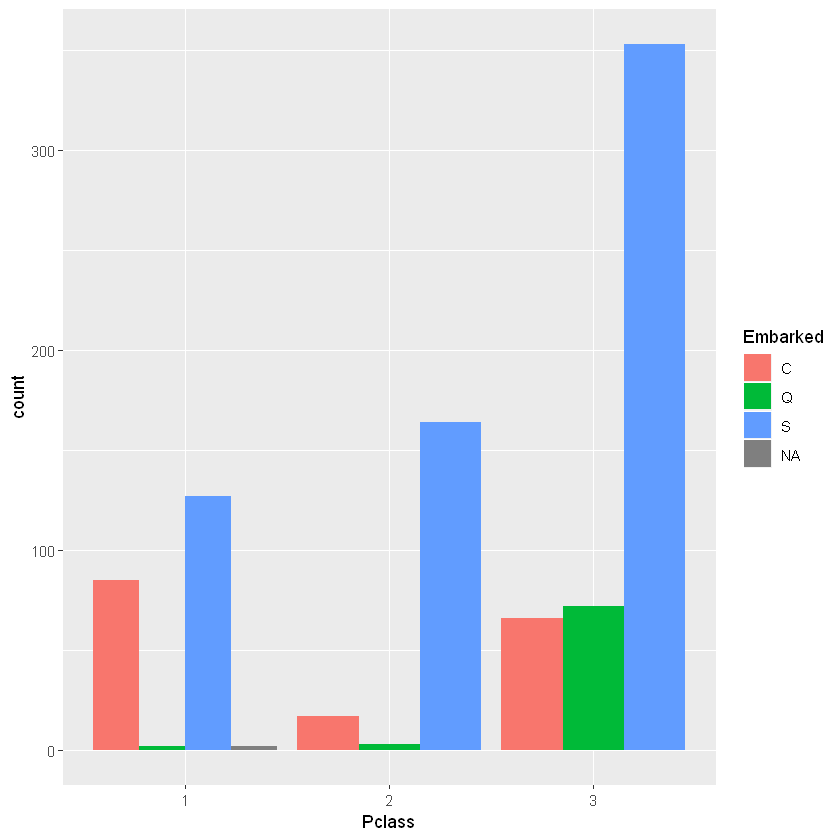

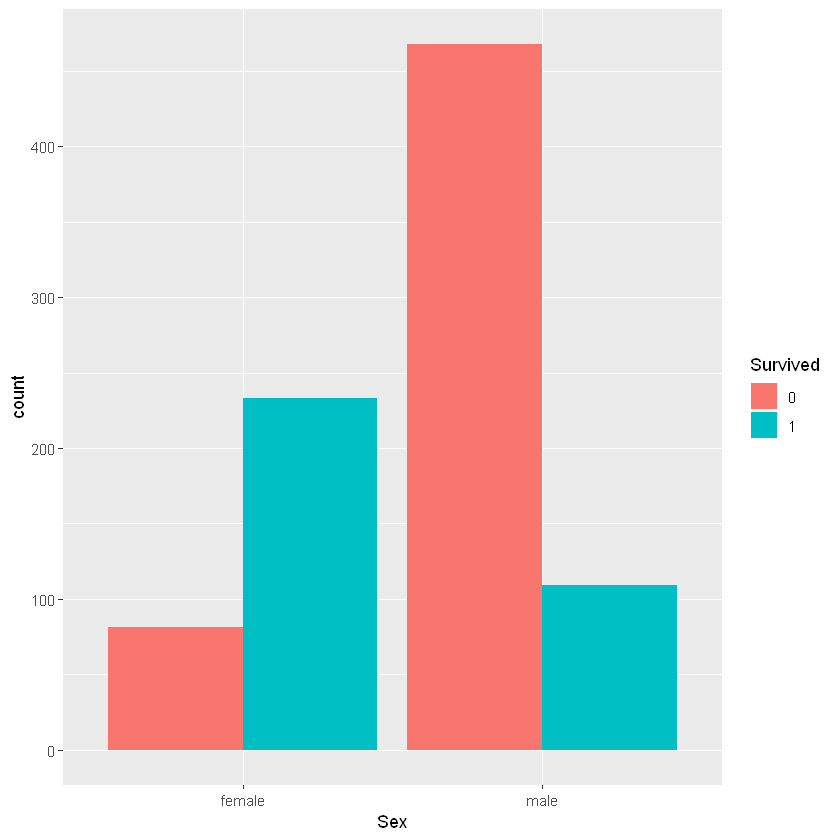

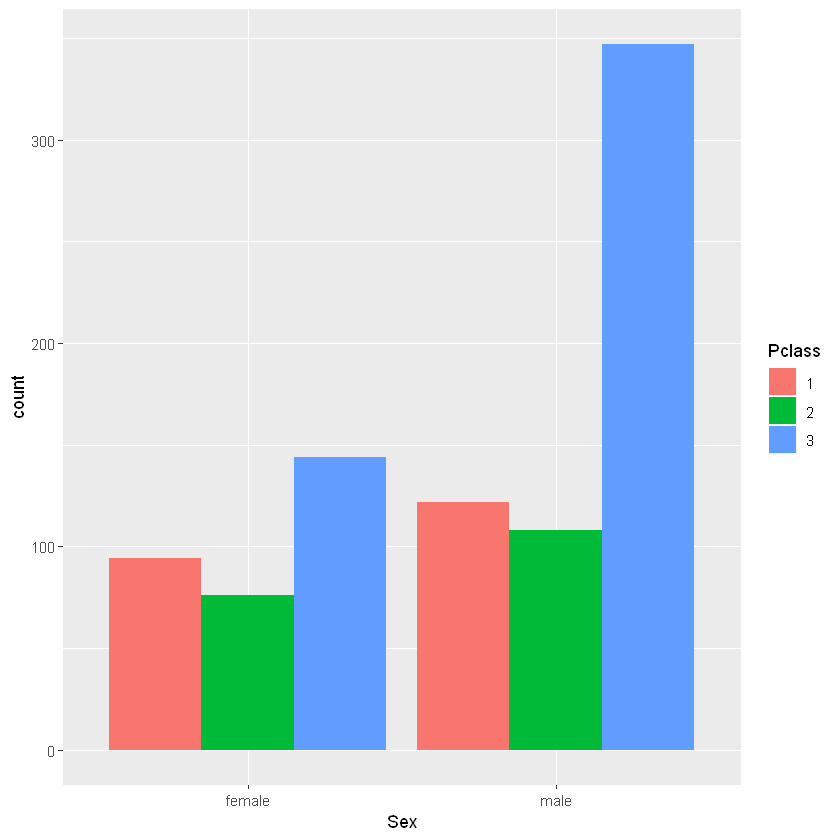

Warning message:
"Removed 177 rows containing non-finite values (stat_density)."

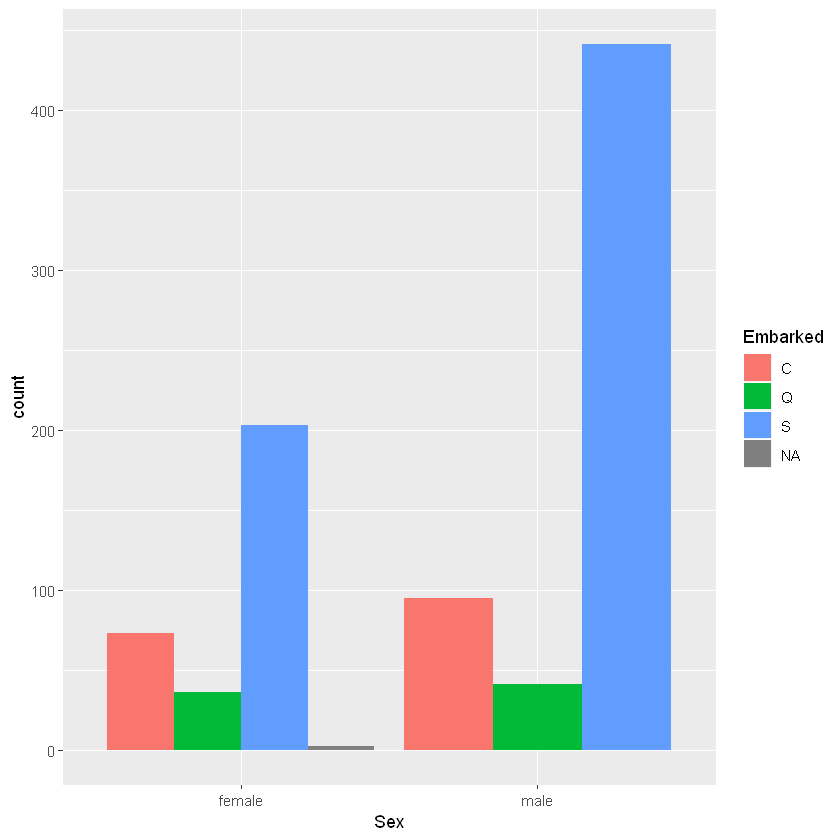

Warning message:
"Removed 177 rows containing non-finite values (stat_density)."

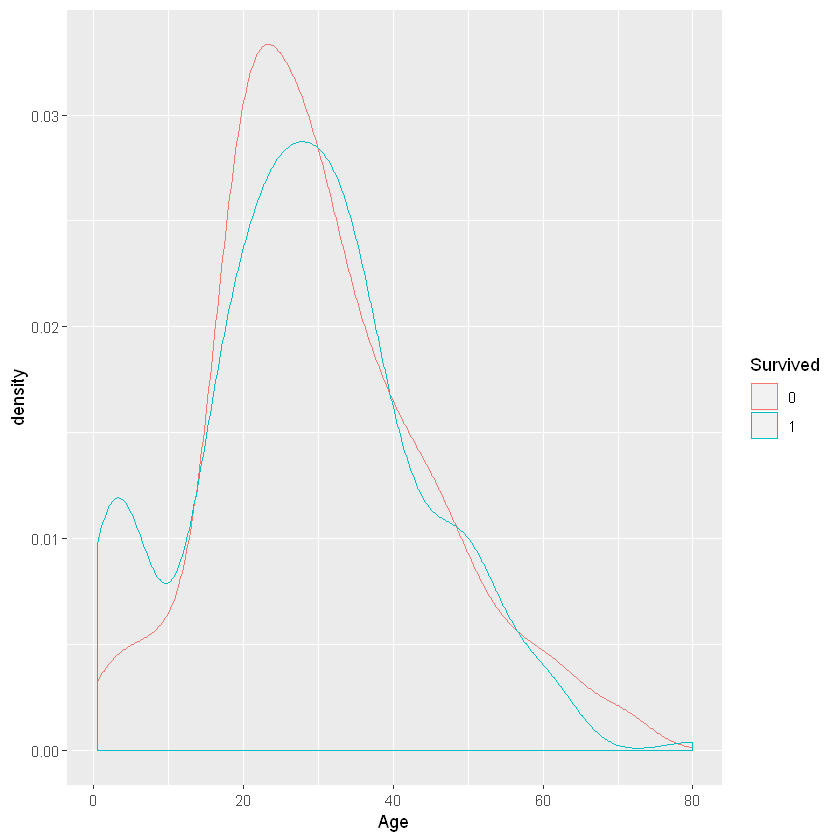

Warning message:
"Removed 177 rows containing non-finite values (stat_density)."

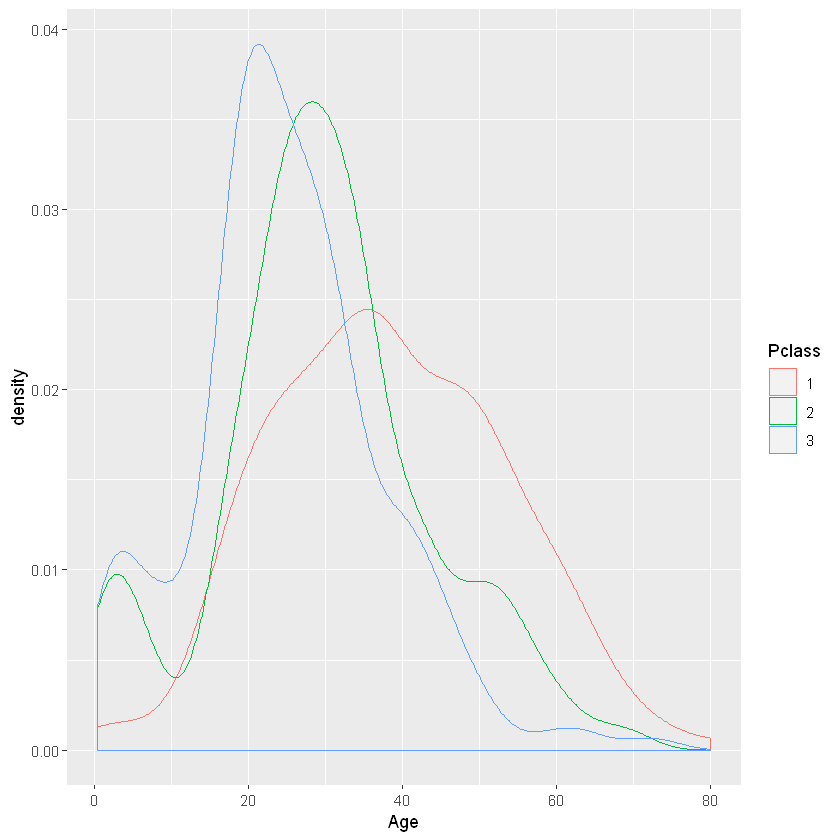

Warning message:
"Removed 177 rows containing non-finite values (stat_density)."

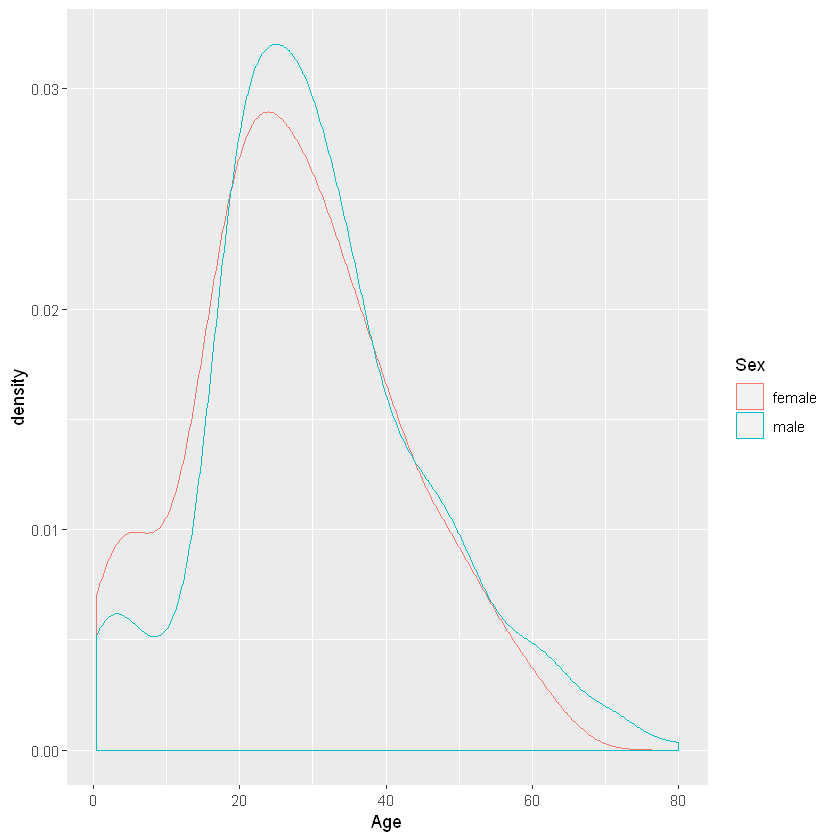

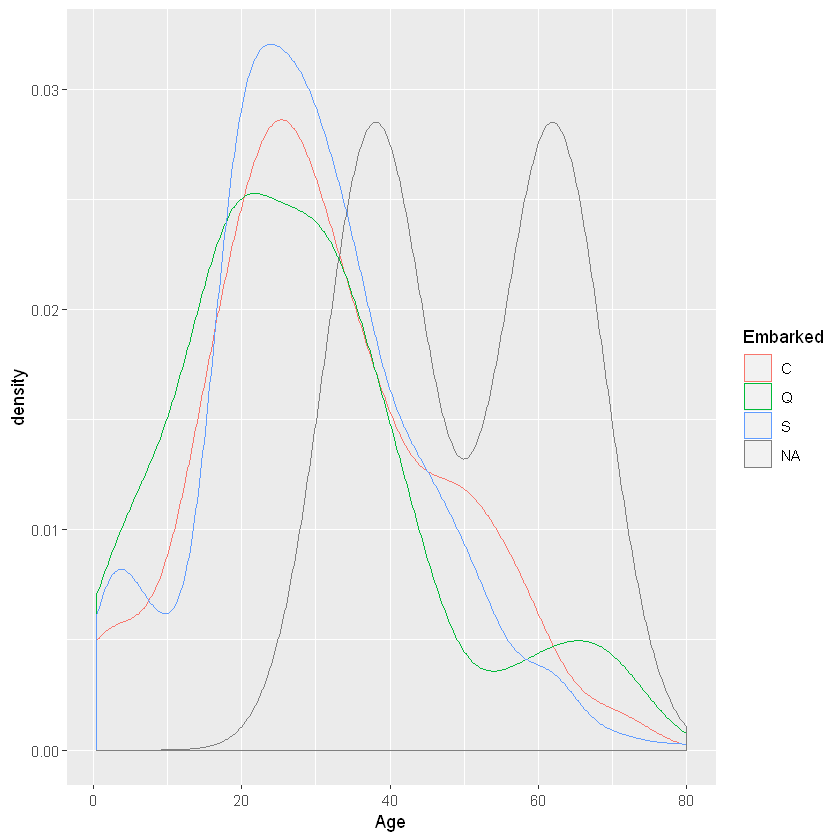

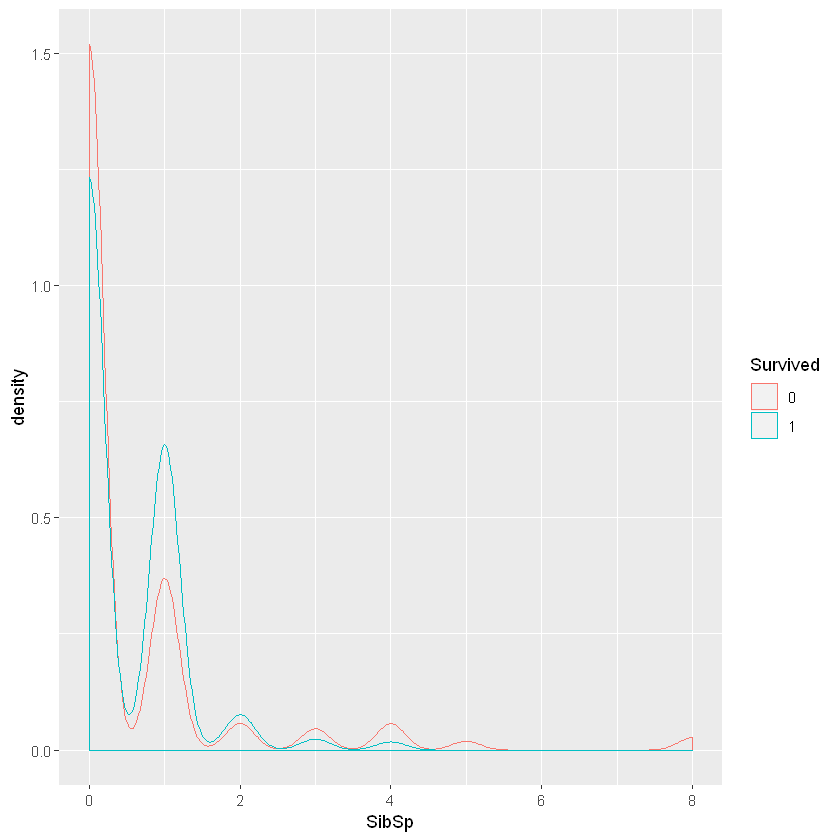

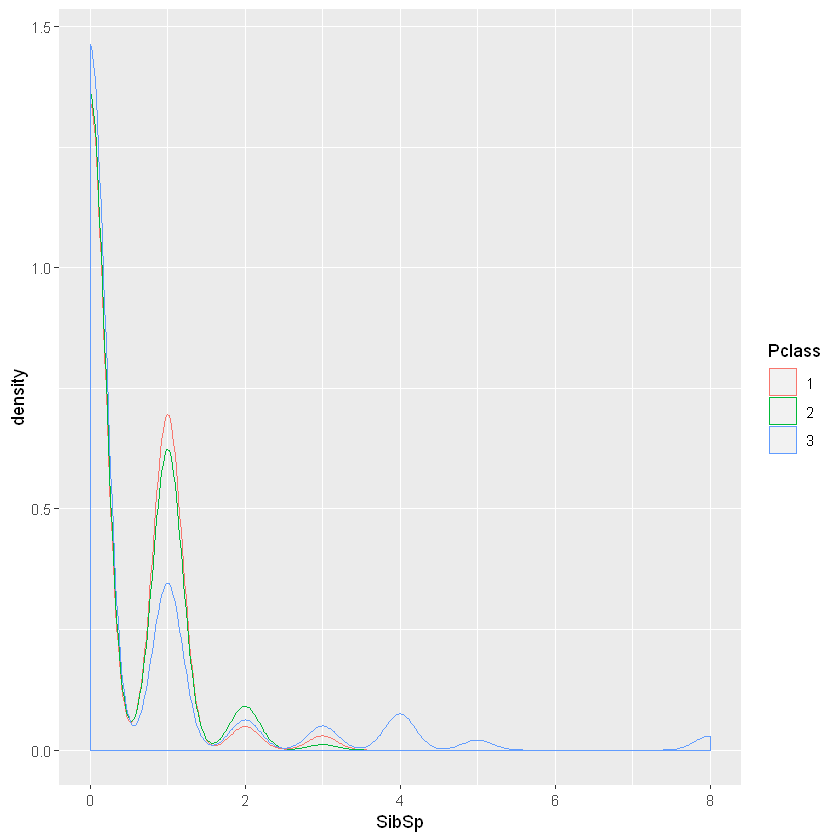

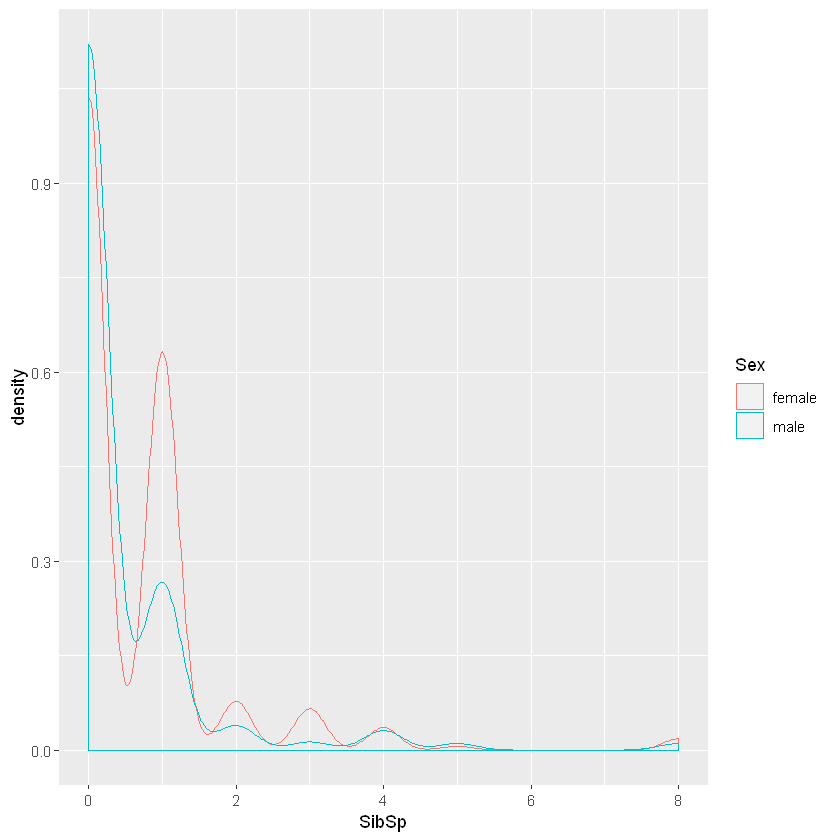

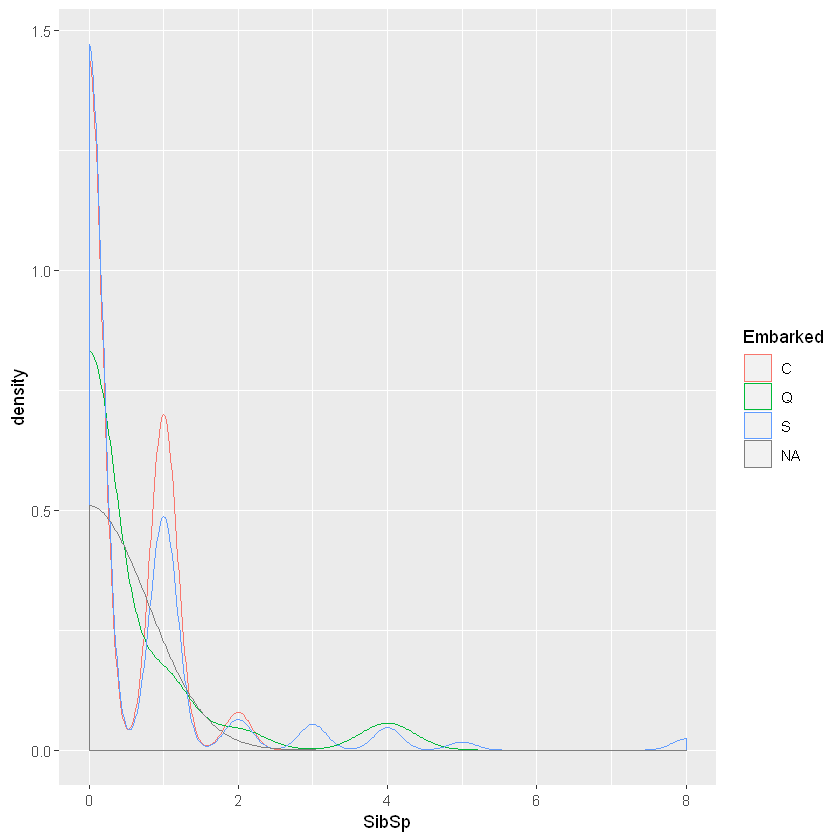

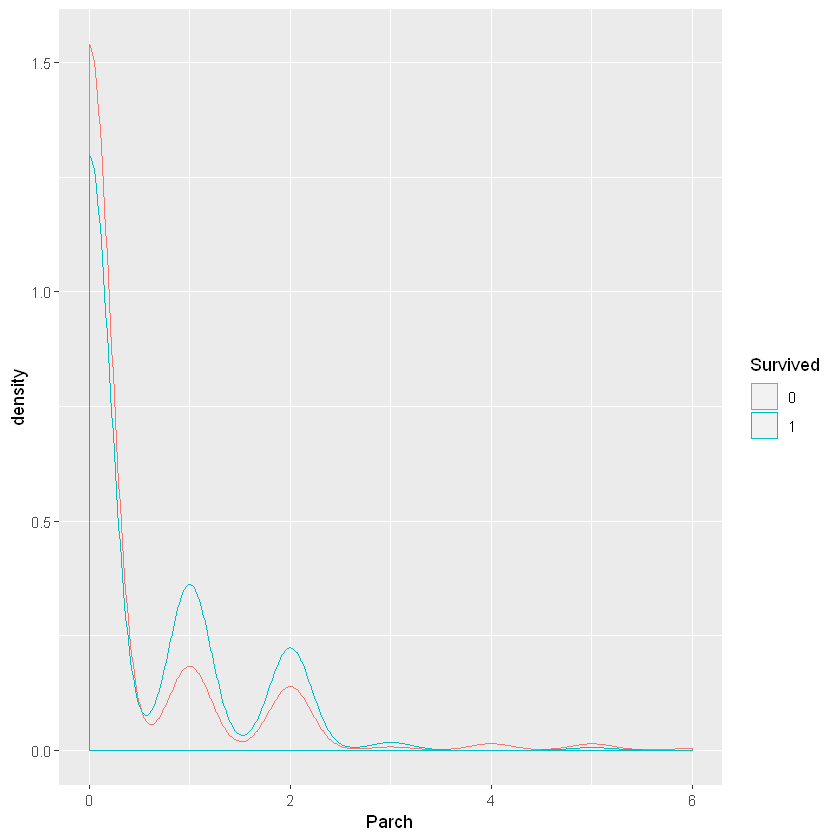

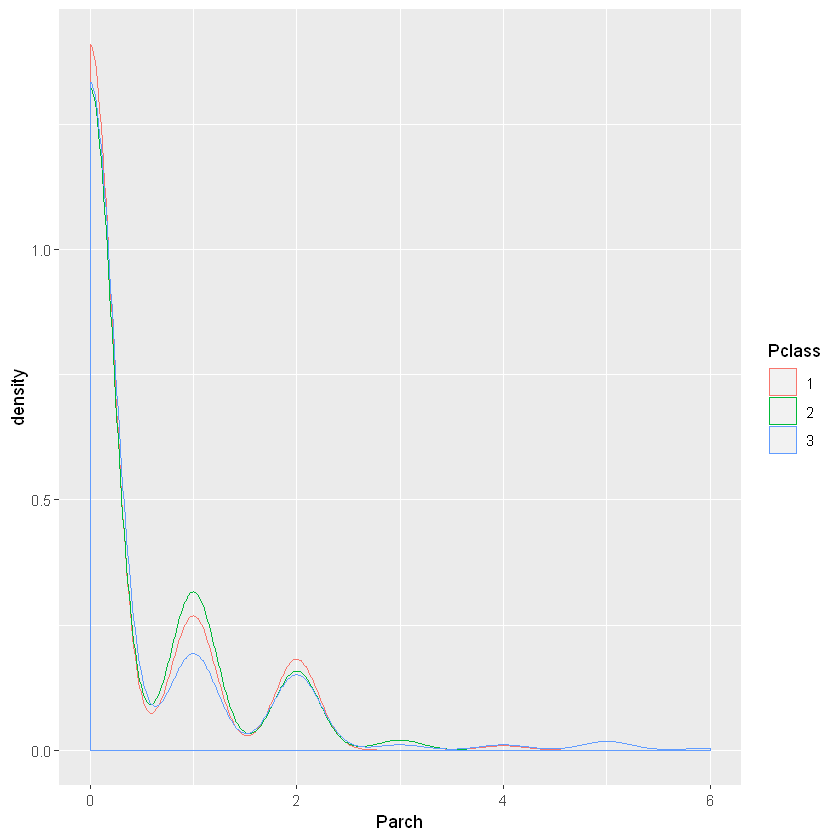

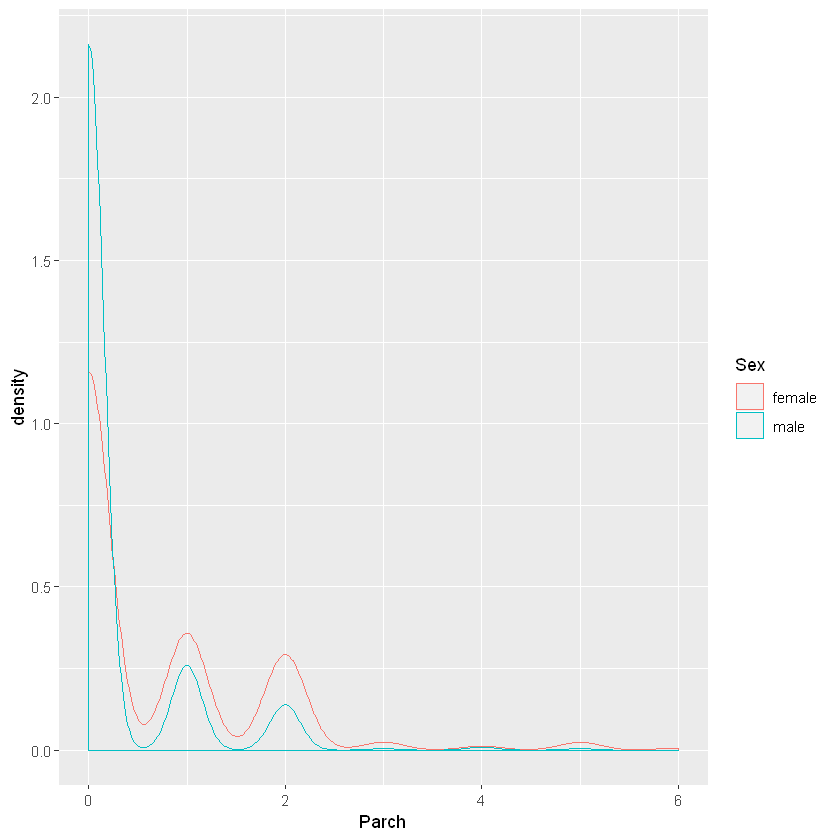

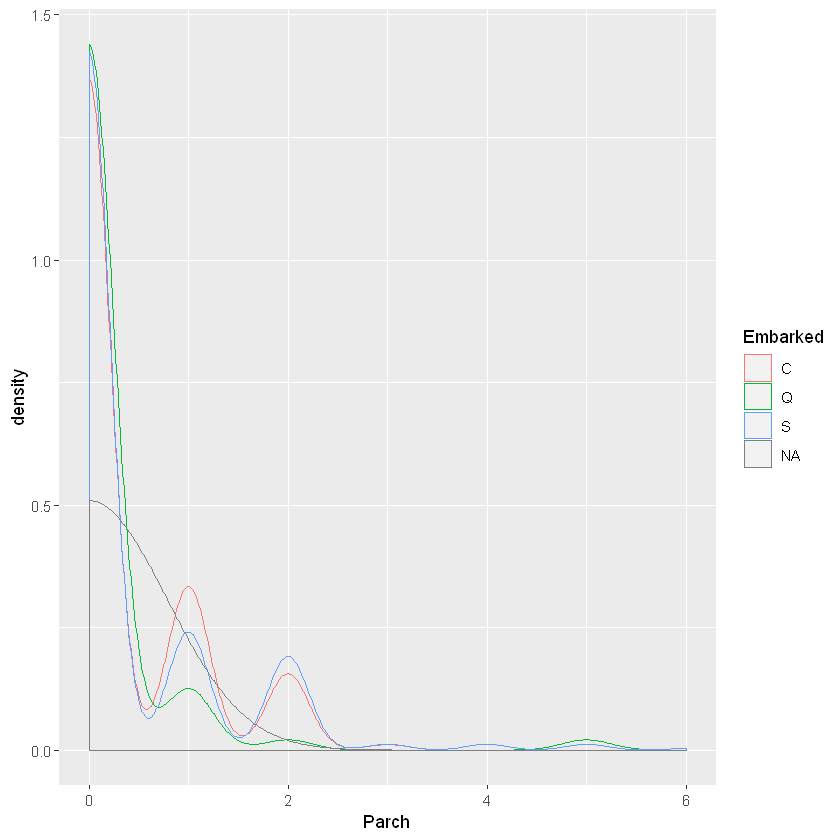

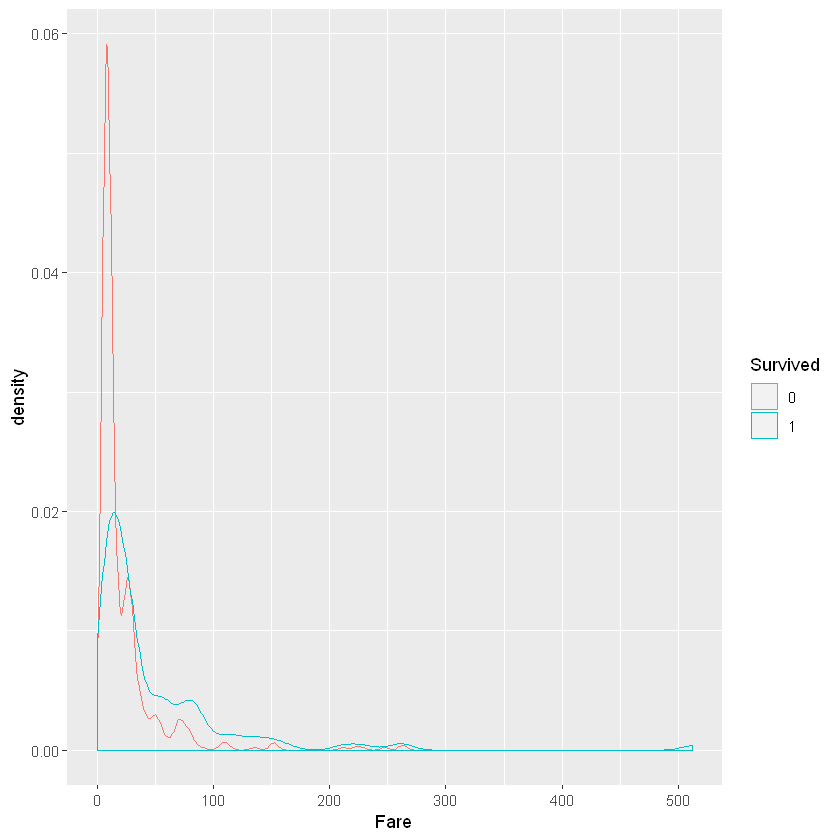

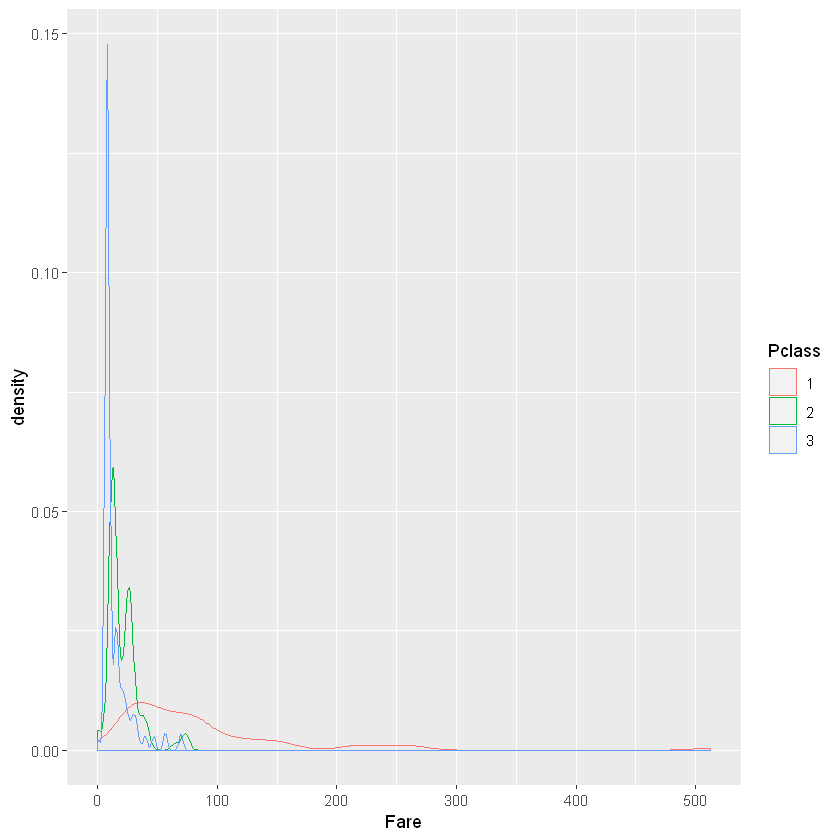

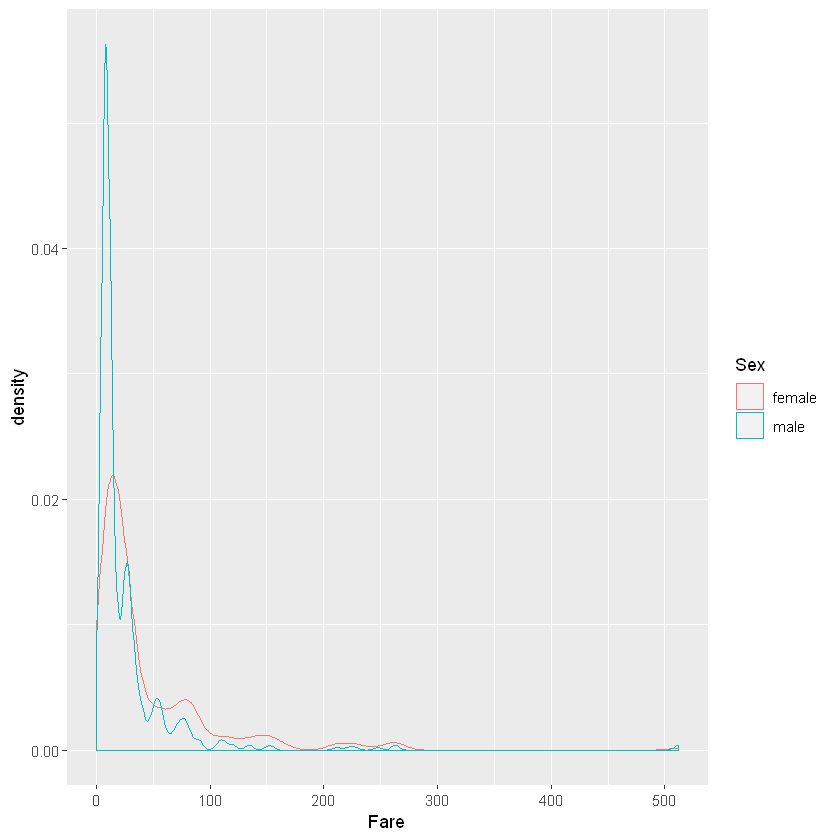

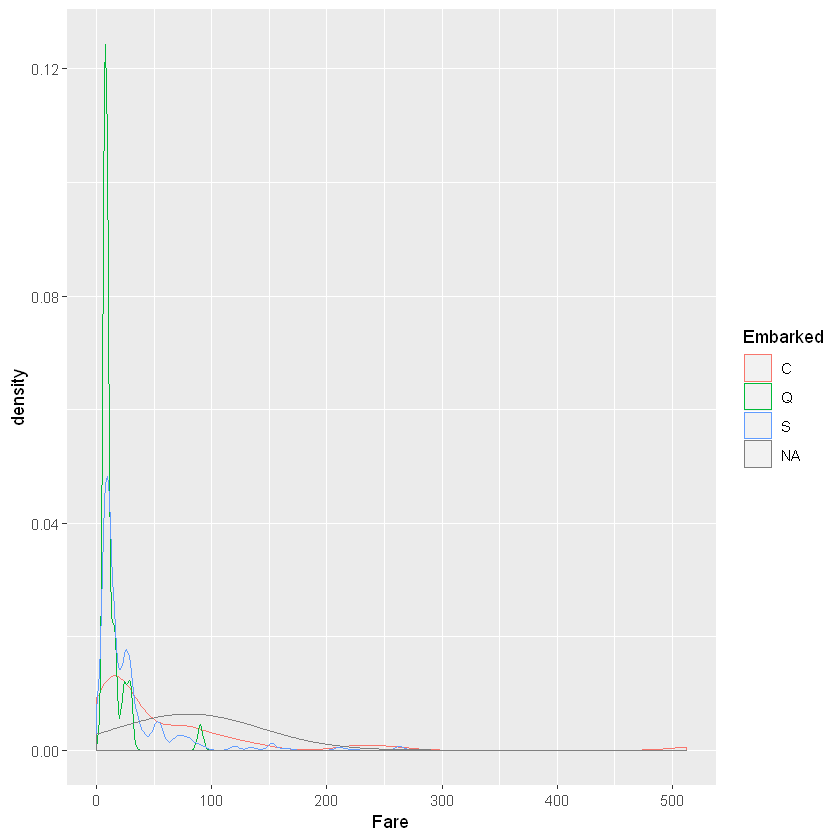

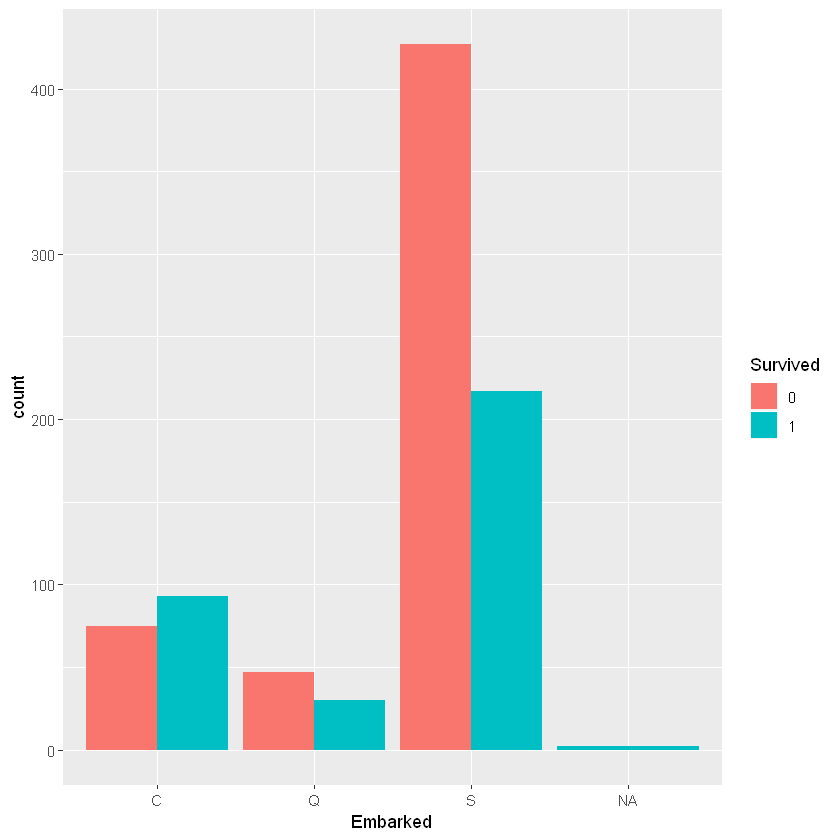

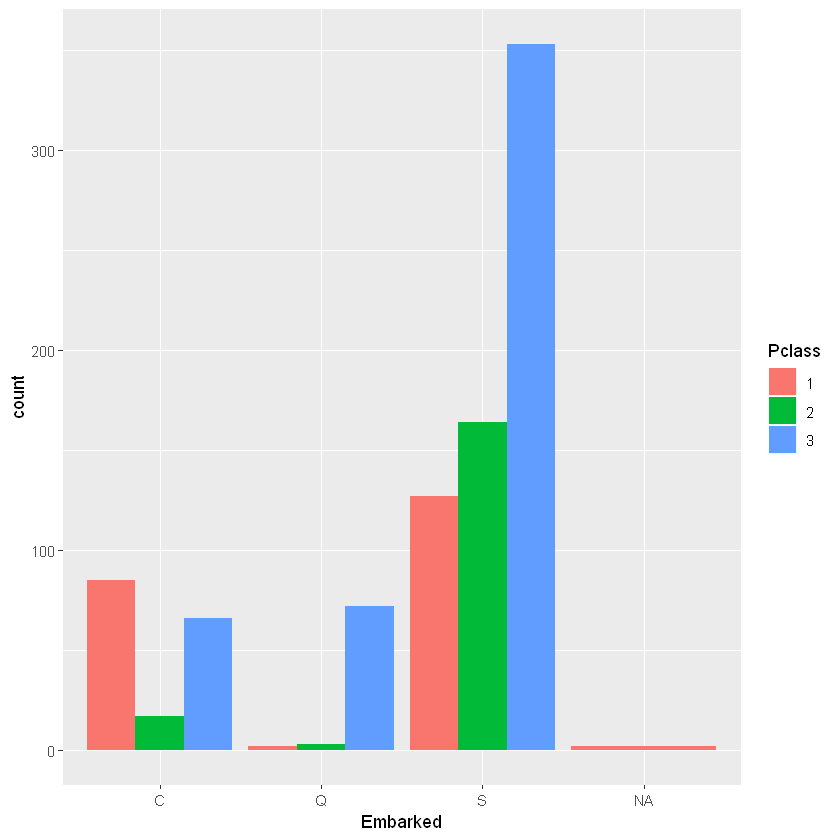

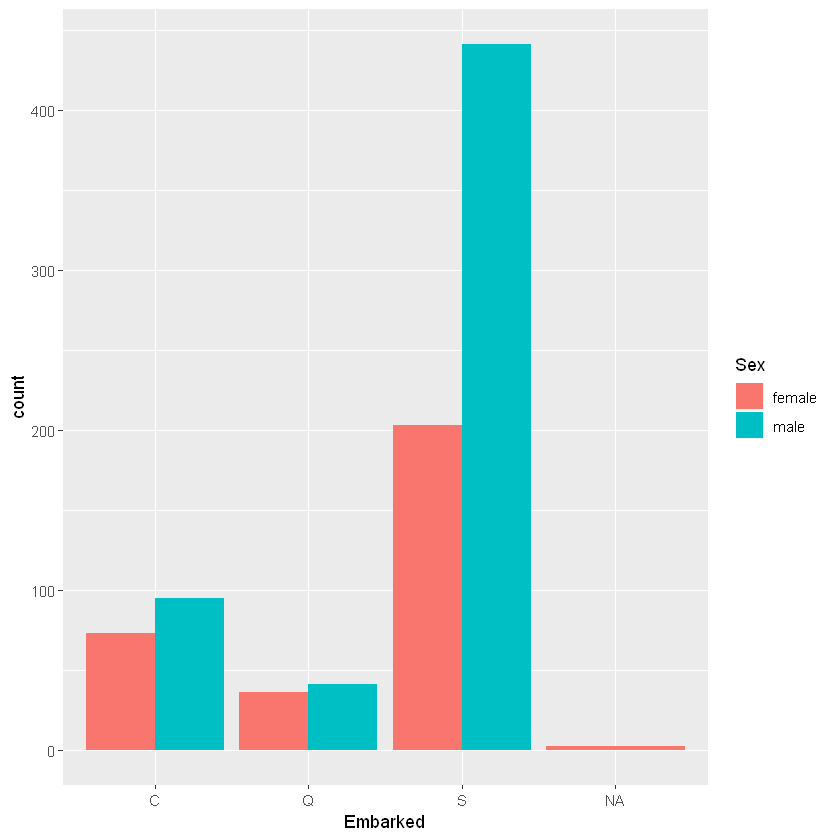

In [16]:
all_visuals=function(x){
  for (i in 1:ncol(x)){
      if (!is.numeric(x[,i])){
        for(j in 1:ncol(x)){
          if (!is.numeric(x[,j]) & names(x)[j]!=names(x)[i]){
            print(ggplot(data=x)+geom_bar(mapping=aes(x=x[,i],fill=x[,j]),position="dodge")+ labs(x=names(x)[i],fill=names(x)[j]))
          }
        }
      }else{
        for(j in 1:ncol(x)){
          if (!is.numeric(x[,j])){
            print(ggplot(data=x)+geom_density(mapping=aes(x=x[,i],color=x[,j]))+labs(x=names(x)[i],color=names(x)[j]))
          }
        }
      }
  }
}
all_visuals(titanic)